In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import itertools
import datetime
from tqdm.notebook import tqdm

In [ ]:
# data = []
# for i in range(1, 12):
#   data_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", f"timeseries-m-{i}.csv")
#   df_month = pd.read_csv(data_path)
#   data.append(df_month)

In [ ]:
# timeseries = pd.concat(data)
# timeseries = timeseries.drop(columns=["Unnamed: 0"])
# timeseries["time"] = pd.to_datetime(timeseries["time"])
# timeseries = timeseries.drop(['occupied'], axis=1)
# timeseries

In [ ]:
# timeseries.reset_index().drop(['index'], axis=1)

In [ ]:
# timeseries_all_month_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "timeseries_all_months.csv")
# timeseries.to_csv(timeseries_all_month_path)

In [ ]:
timeseries_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "timeseries_all_months.csv")
timeseries = pd.read_csv(timeseries_path)

In [ ]:
timeseries = timeseries.drop(columns=["Unnamed: 0"])
timeseries["time"] = pd.to_datetime(timeseries["time"])
timeseries

,time,zone,n_drive,n_drive_unique
0,2019-01-01 00:00:00,SK주차장,12.0,12.0
1,2019-01-01 00:00:00,용정주차장,1.0,1.0
2,2019-01-01 00:00:00,제일주차장,5.0,5.0
3,2019-01-01 00:00:00,웨스트엔드 3차,3.0,3.0
4,2019-01-01 00:00:00,도곡로21길7 공영주차장,2.0,2.0
...,...,...,...,...
3519019,2019-11-30 23:00:00,마곡 747타워,0.0,0.0
3519020,2019-11-30 23:00:00,우덕빌딩,0.0,0.0
3519021,2019-11-30 23:00:00,COCOON DONGDUK_A 빌라 주차장,0.0,0.0
3519022,2019-11-30 23:00:00,래미안강남힐즈 614동,0.0,0.0


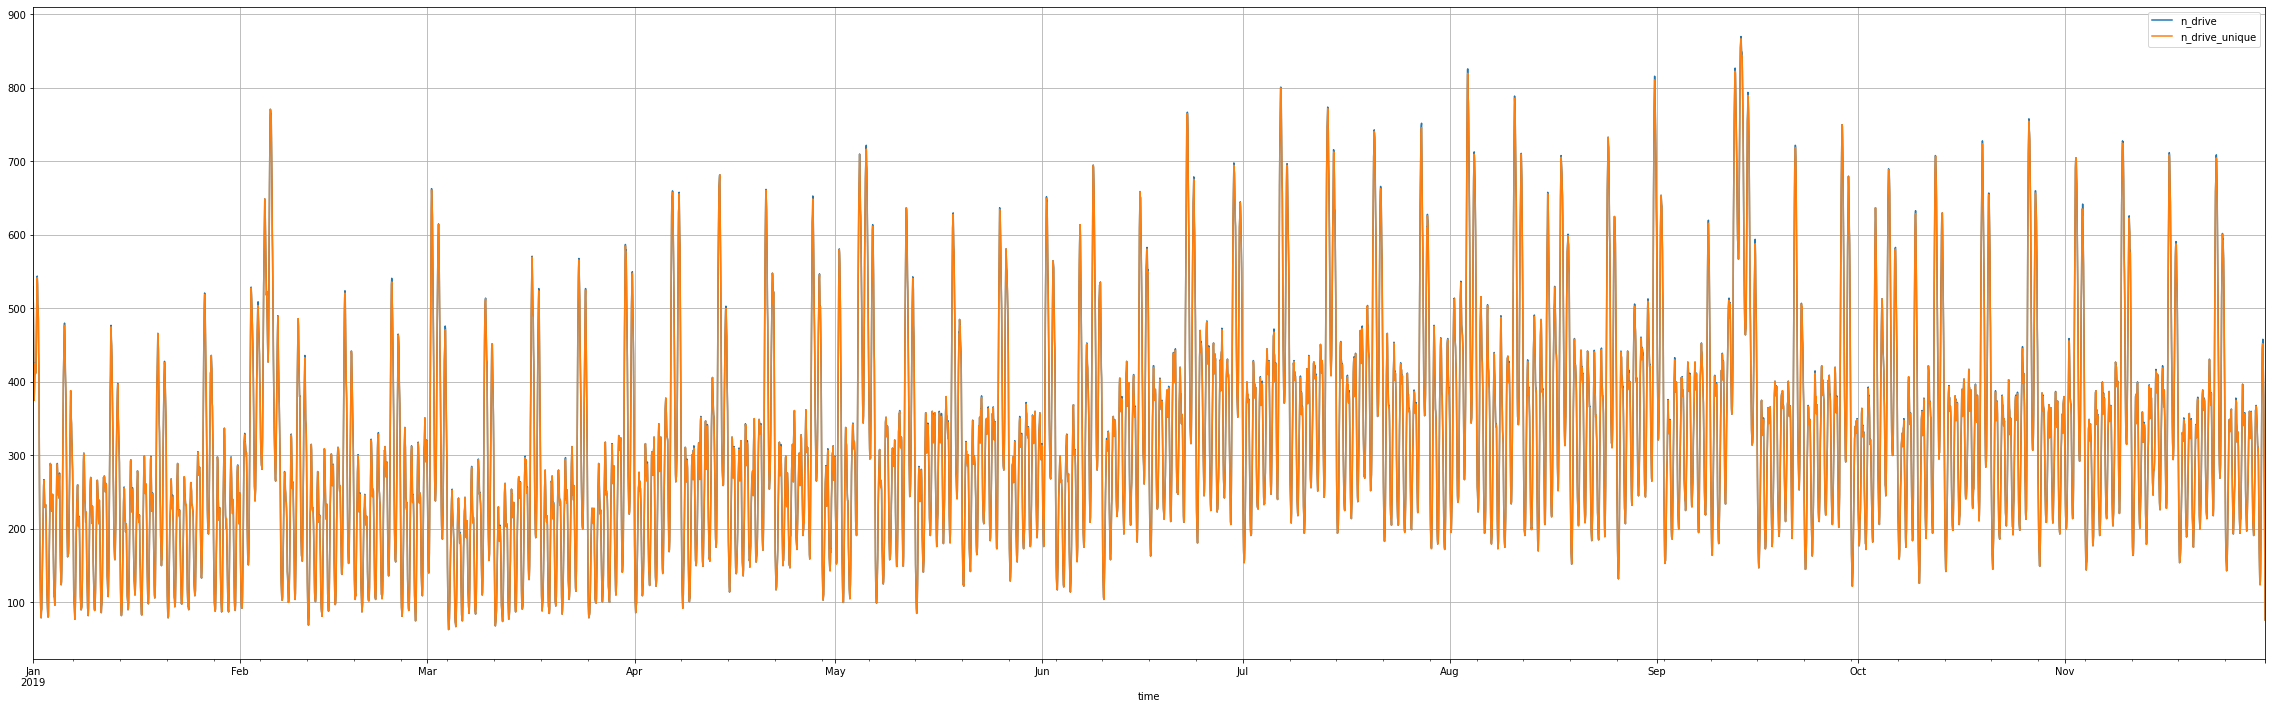

In [ ]:
timeseries.groupby("time").sum().plot(grid=True, figsize=(40, 12))

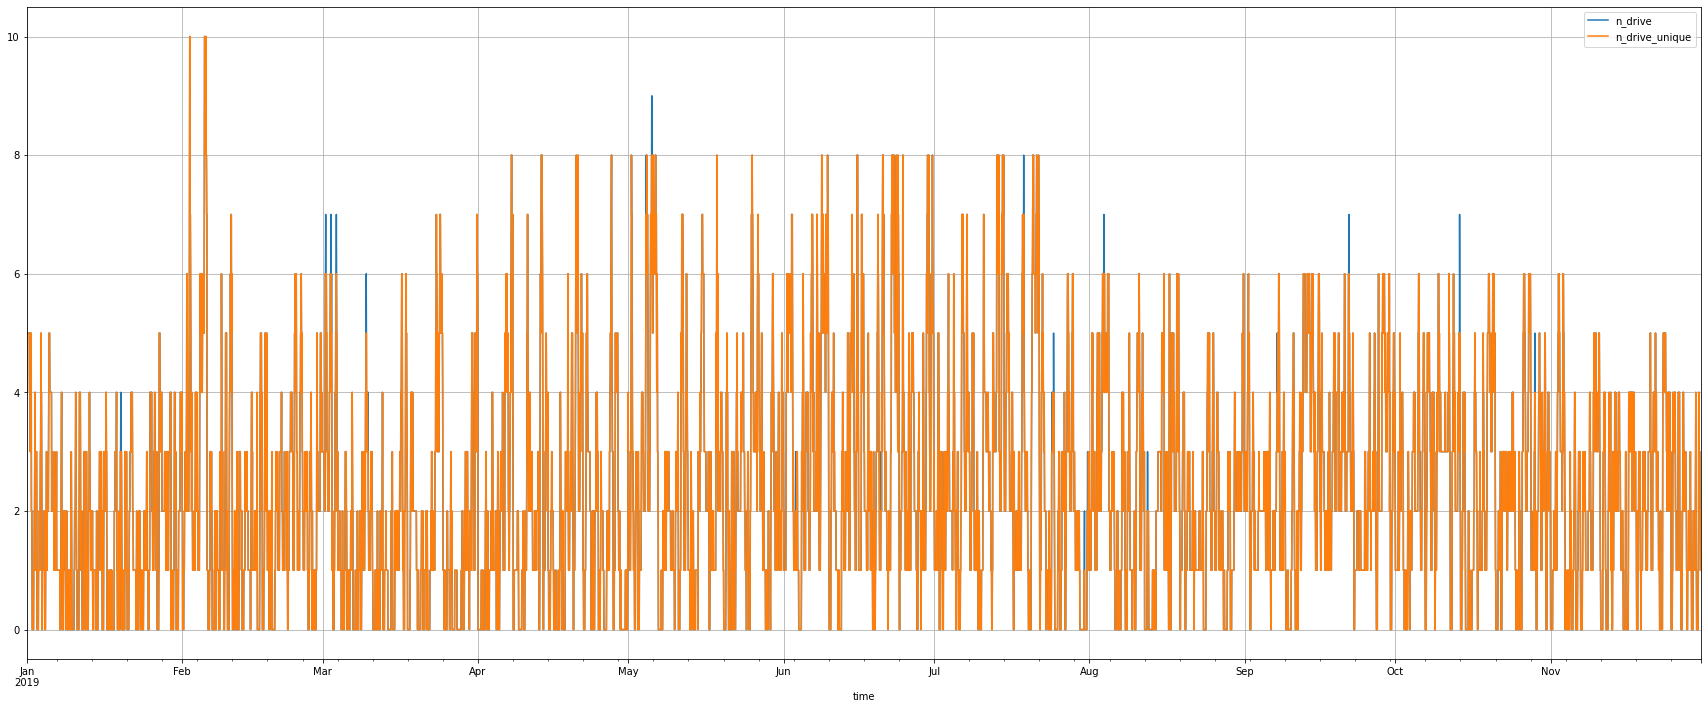

In [ ]:
timeseries[timeseries["zone"] == "88주차장"].groupby("time").sum().plot(grid=True, figsize=(30, 12))

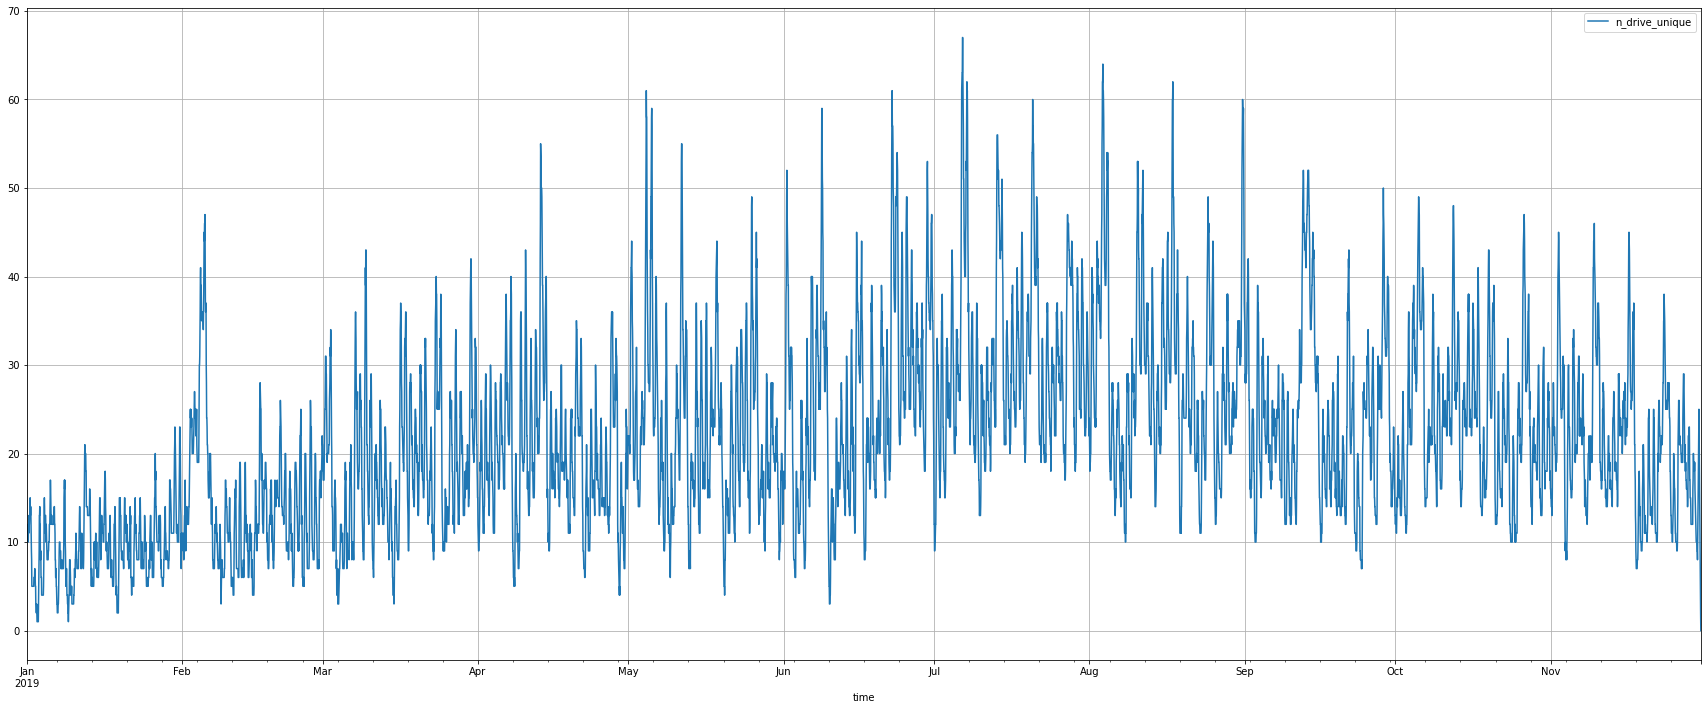

In [ ]:
timeseries[timeseries["zone"] == "SK주차장"].plot(x="time", y="n_drive_unique", grid=True, figsize=(30, 12))

In [ ]:
timeseries.pivot_table('n_drive_unique', ['time'], 'zone')

zone,88주차장,AJ파크 논현점,AJ파크 장안점(덕원주차장),COCOON DONGDUK_A 빌라 주차장,CU 마곡아르디에점(운영종료),CU 홍은벽산점 옆,D&J 주차장,EAN빌딩,GS파크 대치사거리점,GS파크 삼성점,NC백화점 강서점 주차장,SH공공원룸주택 MJ빌,SH공공원룸주택 씨드하우스3,SI타워,SJ등촌골프연습장 주차장,SK연희기지국 주차장,SK주유소 가양점,SK주유소 광덕점,SK주유소 북악점 주차장,SK주차장,SK허브블루빌딩,THE BAY,URG빌딩,V-PLEX(패스트파이브 삼성2호점),e편한세상 4단지 AJ파크,yesAPM주차장,가양4단지아파트 주차장,가양아파트 310동 우측,가양역 10번출구(등촌주공11단지),가양역 1번출구(운영종료),가양역 2번출구,가자 실내낚시터 주차장,가재울초등학교 옆(DMC파크뷰자이1단지)(운영종료),가좌삼거리,가좌역 3번출구(운영종료),감리교신학대학교,갑을명가상가,강남LH3단지 311동,강남구청역 3번출구(카사빌라),강남블루지움,...,한신한진아파트 211동 앞,한신한진아파트(운영종료),한티역 2번출구(메밀연가)(운영종료),한티역 8번출구(볼트EV 부름스테이션),해담하우스 나동,행복유료주차장,현대그린아파트,현대백화점 무역센터점 별관주차장,현대백화점 미아점 별관 주차장,현대비전21,현대아파트 101동,현대인텔렉스,현대주차장,호텔뉴브,호텔데님,호텔선샤인,홍제1동(1지구)견인보관소,홍제비콘드림힐아파트 주차장,홍제주차장,화곡 본-1 공영주차장,화곡1-1 공영주차장,화곡3-1 공영주차장,화곡4동 주민센터 옆,화곡6-1 공영주차장,화곡7-1 공영주차장,화곡본-2 공영주차장,화곡역 3번출구(운영종료),화곡역(운영종료),화성빌라(나동) 주차장,화신주차장,화이트빌,화일주차장,화일초등학교 옆(운영종료),회기역 1번출구 빌라주차장,회기역(베라체캠퍼스),휘경여자중학교 앞,힐스테이트상가,힐스테이트에코동익 오피스텔 103동,힐스테이트에코마곡나루역 오피스텔,힐스테이트에코마곡나루역오피스텔
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,5.0,5.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,2.0,1.0,0.0,12.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0,0.0,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,0.0,4.0,0.0,3.0,5.0,0.0,0.0,6.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,5.0,1.0,7.0,0.0,5.0,0.0
2019-01-01 01:00:00,4.0,5.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,2.0,1.0,0.0,11.0,5.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,4.0,0.0,2.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,5.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,2.0,3.0,1.0,5.0,0.0,6.0,0.0
2019-01-01 02:00:00,4.0,4.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,2.0,1.0,0.0,11.0,4.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,4.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,3.0,1.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,5.0,1.0,8.0,0.0
2019-01-01 03:00:00,4.0,4.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,2.0,1.0,0.0,11.0,4.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,4.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,4.0,1.0,5.0,0.0
2019-01-01 04:00:00,5.0,4.0,2.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,1.0,0.0,11.0,4.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,4.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30 19:00:00,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,10.0,0.0,0.0,1.0,0.0,10.0,3.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,2.0,0.0,1.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,8.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,7.0,2.0,4.0,1.0
2019-11-30 20:00:00,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,0.0,0.0,1.0,0.0,7.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,1.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,6.0,2.0,4.0,1.0
2019-11-30 21:00:00,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,

In [ ]:
timeseries.set_index('time').groupby('zone').resample('W').max().drop(['zone'], axis=1).reset_index().pivot_table('n_drive_unique', ['time'], 'zone').pct_change().corr()

zone,88주차장,AJ파크 논현점,AJ파크 장안점(덕원주차장),COCOON DONGDUK_A 빌라 주차장,CU 마곡아르디에점(운영종료),CU 홍은벽산점 옆,D&J 주차장,EAN빌딩,GS파크 대치사거리점,GS파크 삼성점,NC백화점 강서점 주차장,SH공공원룸주택 MJ빌,SH공공원룸주택 씨드하우스3,SI타워,SJ등촌골프연습장 주차장,SK연희기지국 주차장,SK주유소 가양점,SK주유소 광덕점,SK주유소 북악점 주차장,SK주차장,SK허브블루빌딩,THE BAY,URG빌딩,V-PLEX(패스트파이브 삼성2호점),e편한세상 4단지 AJ파크,yesAPM주차장,가양4단지아파트 주차장,가양아파트 310동 우측,가양역 10번출구(등촌주공11단지),가양역 1번출구(운영종료),가양역 2번출구,가자 실내낚시터 주차장,가재울초등학교 옆(DMC파크뷰자이1단지)(운영종료),가좌삼거리,가좌역 3번출구(운영종료),감리교신학대학교,갑을명가상가,강남LH3단지 311동,강남구청역 3번출구(카사빌라),강남블루지움,...,한신한진아파트 211동 앞,한신한진아파트(운영종료),한티역 2번출구(메밀연가)(운영종료),한티역 8번출구(볼트EV 부름스테이션),해담하우스 나동,행복유료주차장,현대그린아파트,현대백화점 무역센터점 별관주차장,현대백화점 미아점 별관 주차장,현대비전21,현대아파트 101동,현대인텔렉스,현대주차장,호텔뉴브,호텔데님,호텔선샤인,홍제1동(1지구)견인보관소,홍제비콘드림힐아파트 주차장,홍제주차장,화곡 본-1 공영주차장,화곡1-1 공영주차장,화곡3-1 공영주차장,화곡4동 주민센터 옆,화곡6-1 공영주차장,화곡7-1 공영주차장,화곡본-2 공영주차장,화곡역 3번출구(운영종료),화곡역(운영종료),화성빌라(나동) 주차장,화신주차장,화이트빌,화일주차장,화일초등학교 옆(운영종료),회기역 1번출구 빌라주차장,회기역(베라체캠퍼스),휘경여자중학교 앞,힐스테이트상가,힐스테이트에코동익 오피스텔 103동,힐스테이트에코마곡나루역 오피스텔,힐스테이트에코마곡나루역오피스텔
zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
88주차장,1.000000,0.267588,-0.013937,NaN,-0.896258,0.137586,0.096271,NaN,NaN,NaN,0.159565,0.155684,NaN,NaN,0.182144,-0.174053,-0.184434,NaN,0.019001,0.225814,0.226960,NaN,0.018172,0.104000,-0.012465,-0.030645,NaN,NaN,2.192351e-02,0.055255,-0.547045,-0.014913,0.063090,0.437839,-0.896258,NaN,0.224035,NaN,0.091172,NaN,...,NaN,0.058913,-0.106527,NaN,NaN,0.017693,NaN,-0.103741,0.032521,-0.315633,0.061338,NaN,-0.103627,-0.265144,0.063613,0.026401,-0.110708,-0.228841,0.052206,NaN,NaN,-0.224910,2.342190e-02,NaN,NaN,-0.096144,-0.936508,-0.051413,NaN,0.009559,-0.175267,0.062354,-0.704934,-0.331569,0.302811,0.019775,0.148408,0.001185,0.216477,NaN
AJ파크 논현점,0.267588,1.000000,-0.000532,NaN,0.064018,0.006588,-0.004822,NaN,NaN,NaN,-0.071088,0.433397,NaN,NaN,0.211546,-0.003562,0.164819,NaN,-0.133008,0.114149,0.357244,NaN,0.238610,-0.011380,-0.141187,-0.049986,NaN,NaN,6.328124e-03,0.030710,0.253197,0.286710,0.019011,0.087776,0.064018,NaN,0.100902,NaN,0.339521,NaN,...,NaN,-0.212608,0.259364,1.0,NaN,-0.090781,NaN,0.117972,0.056141,-0.001796,0.001545,NaN,-0.099025,0.333333,-0.062928,0.217654,0.115647,0.050732,0.213532,NaN,NaN,-0.019607,1.382045e-02,NaN,NaN,-0.003486,0.045222,-0.220950,NaN,-0.167422,-0.003486,-0.066174,-0.210559,-0.250251,-0.006341,0.005615,0.046281,-0.149872,0.006065,NaN
AJ파크 장안점(덕원주차장),-0.013937,-0.000532,1.000000,NaN,0.500000,NaN,-0.022742,NaN,NaN,NaN,0.007186,NaN,NaN,NaN,0.224398,NaN,-0.076314,NaN,-0.016744,0.386808,-0.035232,NaN,0.090909,0.373709,-0.056439,-0.037039,NaN,NaN,-7.560879e-18,0.021746,-0.404966,0.007186,0.396180,0.065775,0.500000,NaN,0.248931,NaN,0.077520,NaN,...,NaN,0.023156,0.103063,NaN,NaN,0.012622,NaN,0.028868,0.123489,-0.017813,0.016257,NaN,-0.124172,NaN,0.006360,-0.177074,0.007186,0.314414,0.150859,NaN,NaN,-0.014882,-7.957532e-18,NaN,NaN,-0.016257,0.333333,0.042694,NaN,-0.016744,-0.016257,-0.261877,0.577350,0.007186,0.121950,NaN,0.188216,0.092350,0.349043,NaN
COCOON DONGDUK_A 빌라 주차장,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CU 마곡아르디에점(운영종료),-0.896258,0.064018,0.500000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,-0.327327,NaN,0.188982,NaN,NaN,-0.194373,0.500000,NaN,NaN,-0.917663,-0.904194,NaN,NaN,NaN,NaN,NaN,NaN,-0.500000,NaN,-0.500000,1.000000,NaN,-0.124534,NaN,NaN,NaN,...,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,-1.000000,1.000000,NaN,NaN,-0.904194,NaN,NaN,0.142857,NaN,NaN,-0.437384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,-0.500000,NaN,-0.972301,NaN,-0.979838,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
s_d = timeseries.set_index('time').groupby('zone').resample('D').max().drop(['zone'], axis=1).reset_index().pivot_table('n_drive_unique', ['time'], 'zone').pct_change().corr()['AJ파크 논현점']
s_d[(s_d < -0.1) & (s_d > -0.3)]

zone
CU 마곡아르디에점(운영종료)       -0.124142
GS파크 대치사거리점            -0.258199
가양역 1번출구(운영종료)         -0.223645
가좌역 3번출구(운영종료)         -0.139506
강남블루지움                 -0.129832
길음뉴타운 806동 앞           -0.141461
논현빌라(수인빌라트 뒤편)         -0.182638
다온빌라                   -0.195384
대림경동아파트(운영종료)          -0.148669
대명주차장                  -0.150888
대신초교 뒤(두산아파트)(운영종료)    -0.219528
대치2동문화센터               -0.169159
래미안아름숲아파트 108동 주차장     -0.120622
마곡동 일성트루엘(운영종료)        -0.278428
마곡센트럴대방디엠시티 오피스텔       -0.123244
산호빌라                   -0.129359
서대문우체국 뒤(운영종료)         -0.141269
세일주차장                  -0.125095
신설동역 9번출구(운영종료)        -0.250029
씨티라이프61 오피스텔           -0.178142
아이콘역삼                  -0.105294
역삼동(강남주차장)(운영종료)       -0.106885
역삼역 6번출구(운영종료)         -0.123789
역삼역 8번출구(포스트빌)(운영종료)   -0.219366
연희중학교 뒤(MJ빌)           -0.114843
전농1동 주민센터 옆            -0.127615
정릉 중앙하이츠빌 1단지 106동     -0.111139
종암사거리(운영종료)            -0.158352
학동공원 앞(운영종료)           -0.113631
현대주차장                  -0.124834
Name:

In [ ]:
s = timeseries.set_index('time').groupby('zone').resample('W').max().drop(['zone'], axis=1).reset_index().pivot_table('n_drive_unique', ['time'], 'zone').pct_change().corr()['AJ파크 논현점']
s[(s < -0.1) & (s > -0.3)]

zone
SK주유소 북악점 주차장                  -0.133008
e편한세상 4단지 AJ파크                 -0.141187
강남지웰파인즈 오피스텔(운영종료)             -0.261267
강변코아루 아파트                      -0.280005
개화산역 공영주차장                     -0.110280
거주자우선주차구역 (홍제1동(1지구) 051-20)   -0.137640
거주자우선주차구역(북가좌2동 001-14)        -0.133008
계성고등학교 뒤                       -0.136315
골든서울호텔 주차장                     -0.122630
국민대 주차장                        -0.133839
까치산역 4번출구(백구주차장)(운영종료)         -0.220950
등촌노블리움                         -0.102387
마곡 더랜드타워(운영종료)                 -0.220950
명문막국수 주차장                      -0.124967
명지대학교 경상관 주차장                  -0.154454
발산역 9번출구                       -0.131810
방화동성아파트 주차장                    -0.258143
방화역(동) 공영주차장                   -0.145475
북가좌 DMC래미안2단지(바다쉐어하우스)(운영종료)   -0.261267
북가좌1동주민센터 앞(운영종료)              -0.261267
북아현 나대지주차장                     -0.220950
서울 아현역 1번출구[V]                 -0.185848
세원빌딩(Z.A.G. POT)               -0.192798
수서역 공영주차장                      -0.252244
스탠다드호텔 주차장 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_

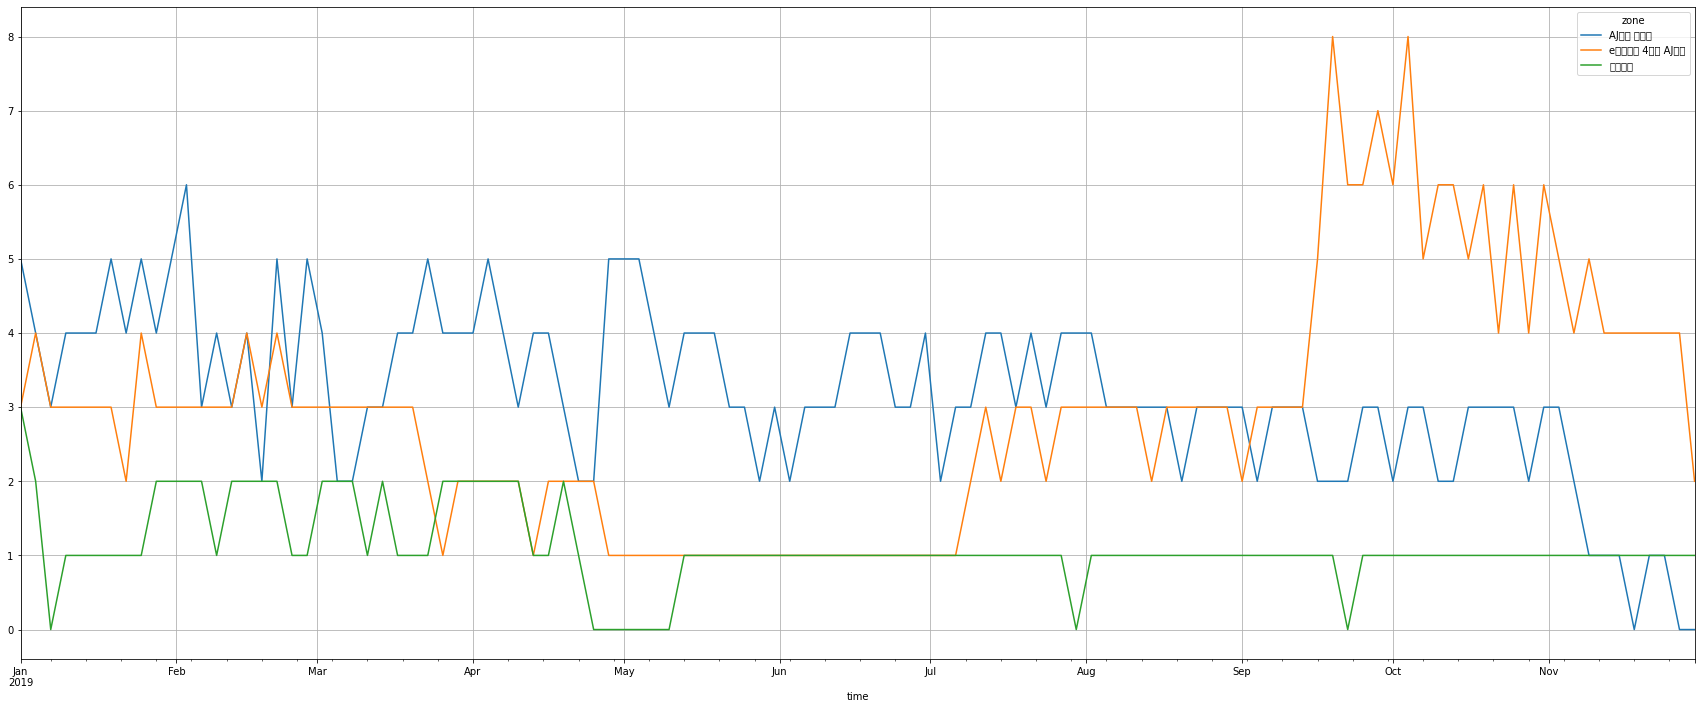

In [ ]:
timeseries.set_index('time').groupby('zone').resample('3D').max().drop(['zone'], axis=1).reset_index().pivot_table('n_drive_unique', ['time'], 'zone')[['AJ파크 논현점', 'e편한세상 4단지 AJ파크', '풍산빌딩']].plot(grid=True, figsize=(30, 12))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_

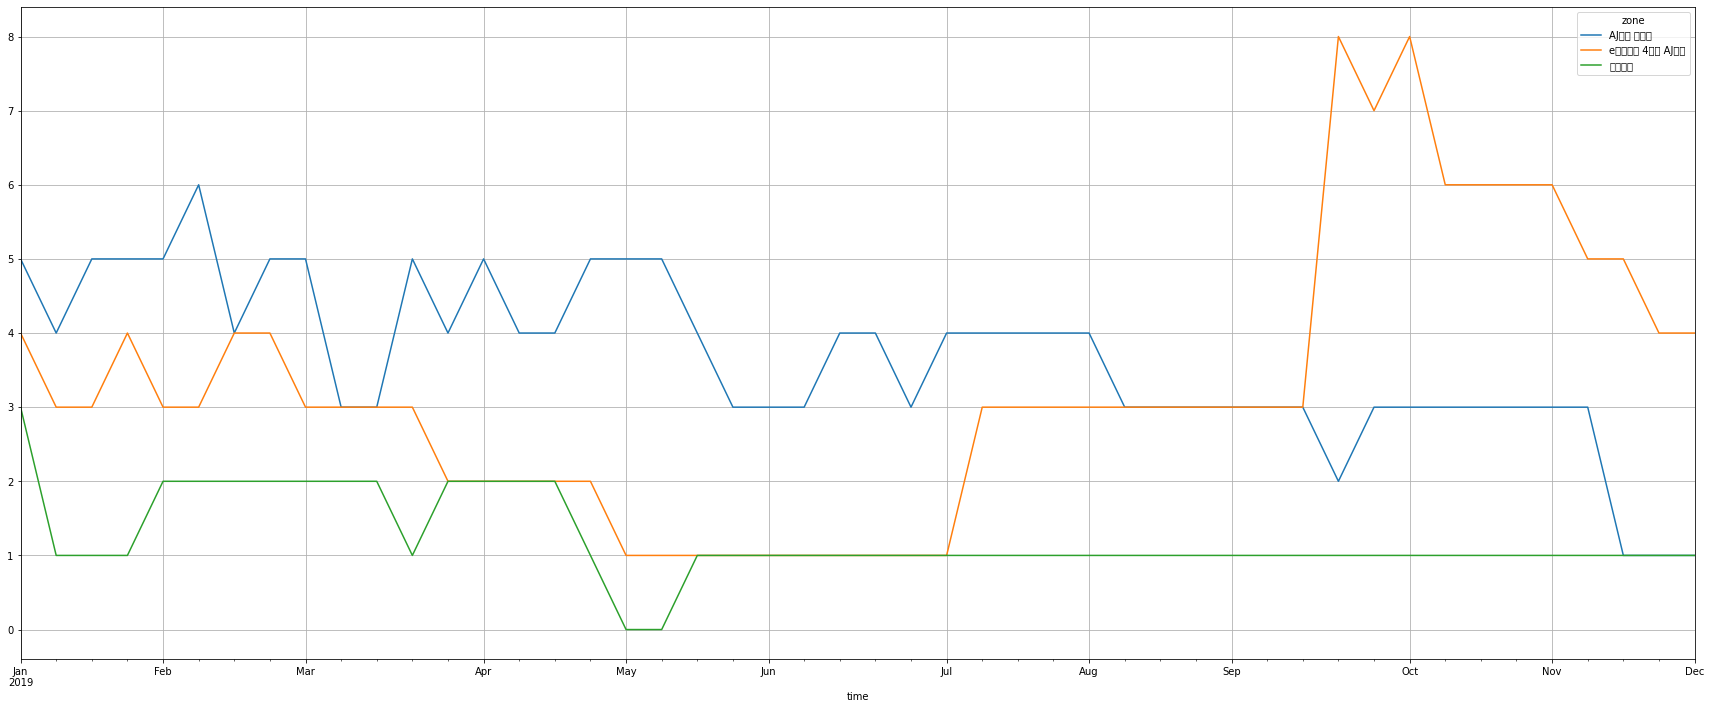

In [ ]:
timeseries.set_index('time').groupby('zone').resample('W').max().drop(['zone'], axis=1).reset_index().pivot_table('n_drive_unique', ['time'], 'zone')[['AJ파크 논현점', 'e편한세상 4단지 AJ파크', '풍산빌딩']].plot(grid=True, figsize=(30, 12))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45436 missing from current font.
  font.set_

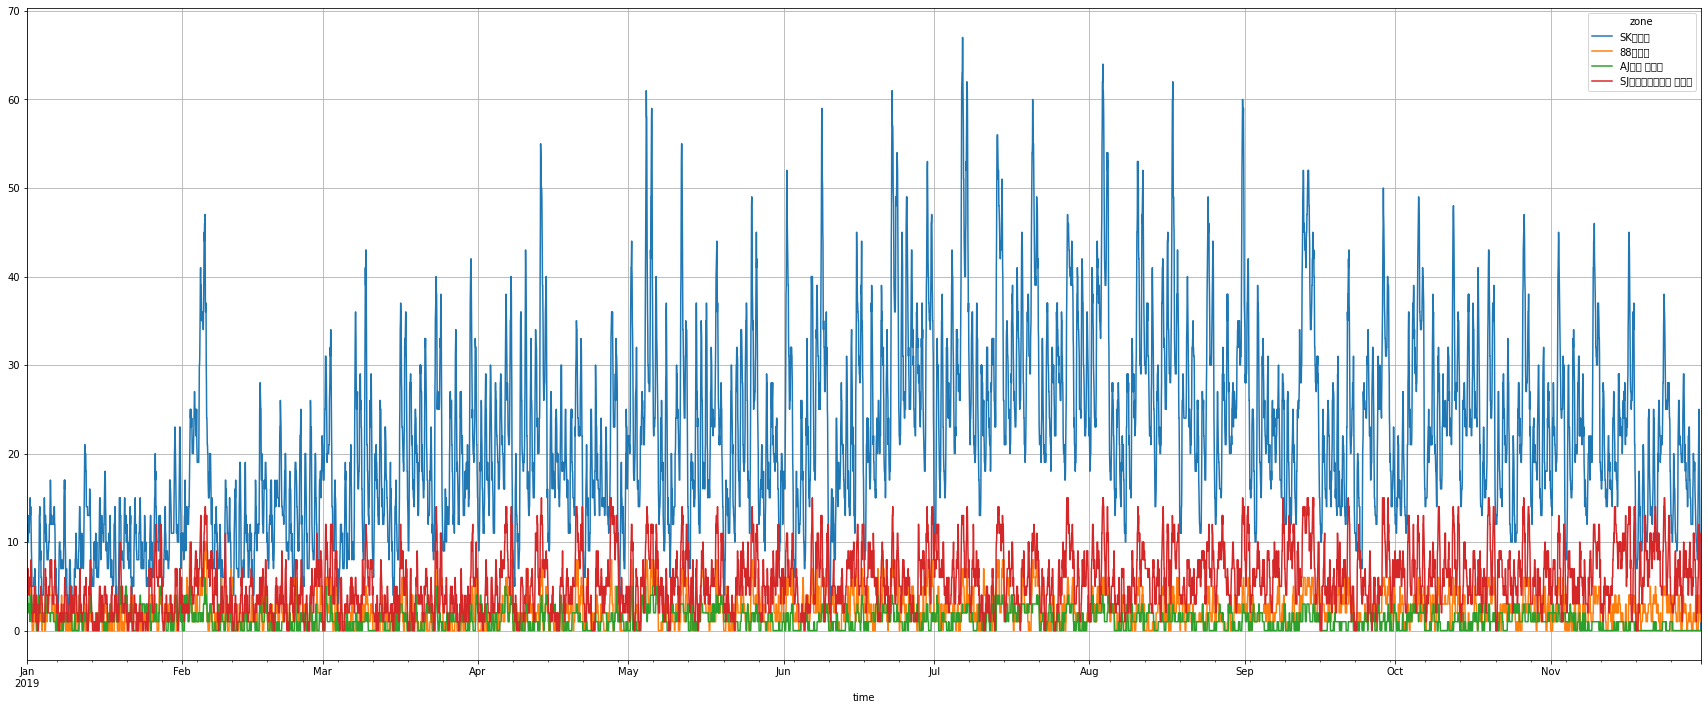

In [ ]:
timeseries.pivot_table('n_drive_unique', ['time'], 'zone')[['SK주차장', '88주차장', 'AJ파크 논현점', 'SJ등촌골프연습장 주차장']].plot(grid=True, figsize=(30, 12))

In [ ]:
timeseries[timeseries["zone"] == "SK주차장"].set_index("time").resample("W").sum().pct_change()

,n_drive,n_drive_unique
time,,
2019-01-06,NaN,NaN
2019-01-13,0.146341,0.145555
2019-01-20,0.072066,0.071429
2019-01-27,-0.001280,0.000000
2019-02-03,0.544231,0.543590
2019-02-10,0.198838,0.198920
2019-02-17,-0.327909,-0.328022
2019-02-24,0.168985,0.169588
2019-03-03,0.144557,0.144116


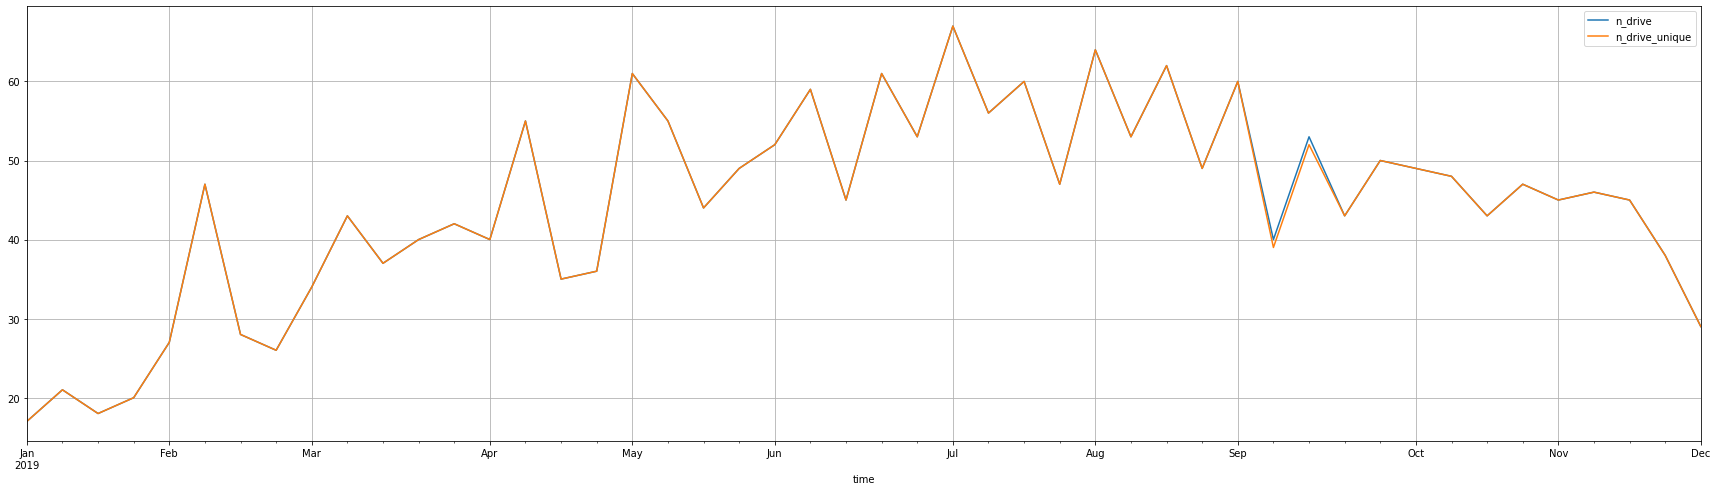

In [ ]:
timeseries[timeseries["zone"] == "SK주차장"].set_index("time").resample("W").max().plot(grid=True, figsize=(30,8))

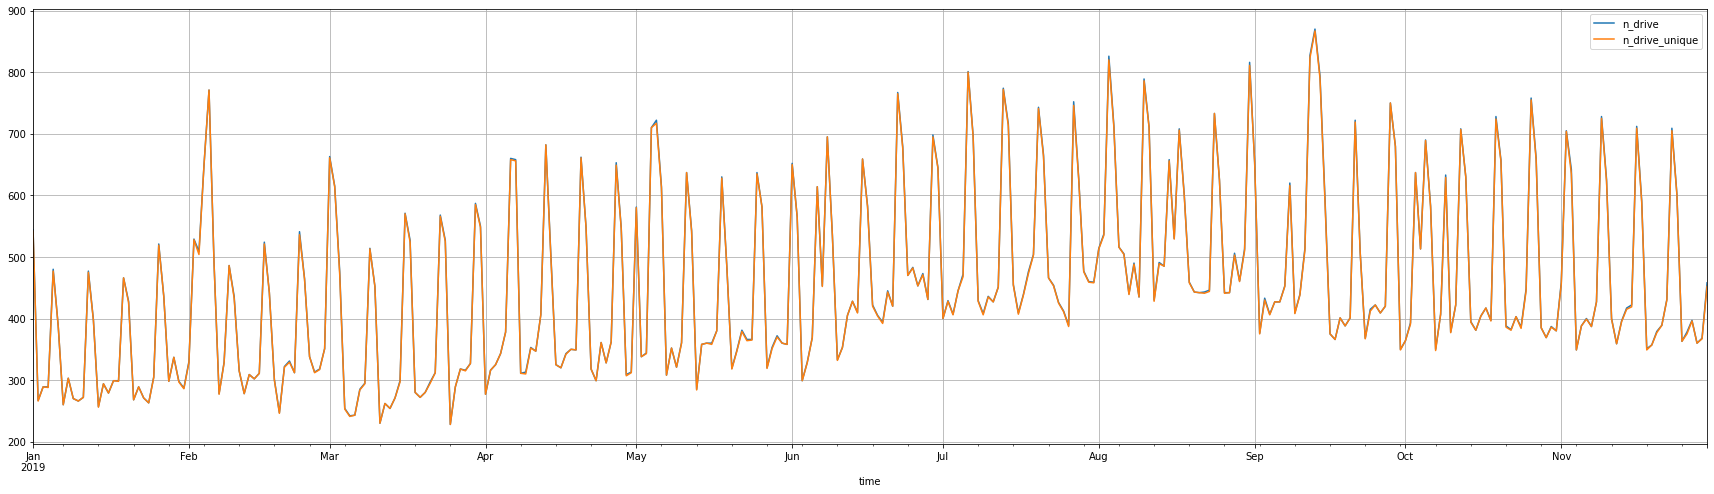

In [ ]:
timeseries.groupby("time").sum().resample("D").max().plot(grid=True, figsize=(30,8))

In [ ]:
timeseries[timeseries["zone"] == "SK주차장"]["n_drive_unique"]

0          12.0
439        11.0
878        11.0
1317       11.0
1756       11.0
           ... 
3516829    10.0
3517268     7.0
3517707     4.0
3518146     2.0
3518585     0.0
Name: n_drive_unique, Length: 8016, dtype: float64

In [ ]:
timeseries[timeseries["zone"] == "SK주차장"]["n_drive_unique"].corr(timeseries[timeseries["zone"] == "SK주차장"]["n_drive_unique"])

1.0

In [ ]:
timeseries[timeseries["zone"] == "SK주차장"]["n_drive_unique"].diff()

0          NaN
439       -1.0
878        0.0
1317       0.0
1756       0.0
          ... 
3516829   -2.0
3517268   -3.0
3517707   -3.0
3518146   -2.0
3518585   -2.0
Name: n_drive_unique, Length: 8016, dtype: float64

In [ ]:
timeseries[timeseries["zone"] == "SK주차장"]["n_drive_unique"].pct_change()

0               NaN
439       -0.083333
878        0.000000
1317       0.000000
1756       0.000000
             ...   
3516829   -0.166667
3517268   -0.300000
3517707   -0.428571
3518146   -0.500000
3518585   -1.000000
Name: n_drive_unique, Length: 8016, dtype: float64

# 전체 차량 숫자 

In [ ]:
data_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "new_socar_data.csv")
data = pd.read_csv(data_path)
data["reservation_start_at"] = pd.to_datetime(data["reservation_start_at"])
data["reservation_return_at"] = pd.to_datetime(data["reservation_return_at"])
data.head()

,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip
0,19600422,8352,6qA1i9+DXTJYgfWPqSGhszRpgNkUzFATBTG4XG7OciA=,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,2016-12-10,2277.0,False,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN
1,19637831,9699,9uzg+C7Ng5hsI0So4WgJaUME+1dgR1LXyy4c8TEM1zY=,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,male,2015-07-06,13156.0,False,스포티지,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN,NaN
2,19670646,11933,SwEY5le8plfdi3EKoLBAF87zCTzFgIUo4nGWkZ6tOcM=,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,2015-10-07,318.0,True,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN,NaN
3,19692831,7397,vmk4kp/a2AYP8VnGWJUYlbSOff+SxEG18D6fqKRkAOk=,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,2017-10-13,1288.0,False,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN,NaN
4,19728911,8809,gdP+78Hhm+MZ4ZxIm8kNVvMNzKJBxbiDfBsflsMcwLA=,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,2017-08-13,2658.0,False,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN,NaN


In [ ]:
data['month'] = data['reservation_return_at'].apply(lambda x: x.month)
data['week'] = data['reservation_return_at'].apply(lambda x: x.week)
data

,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip,month,week
0,19600422,8352,6qA1i9+DXTJYgfWPqSGhszRpgNkUzFATBTG4XG7OciA=,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,2016-12-10,2277.0,False,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1
1,19637831,9699,9uzg+C7Ng5hsI0So4WgJaUME+1dgR1LXyy4c8TEM1zY=,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,male,2015-07-06,13156.0,False,스포티지,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN,NaN,1,1
2,19670646,11933,SwEY5le8plfdi3EKoLBAF87zCTzFgIUo4nGWkZ6tOcM=,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,2015-10-07,318.0,True,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN,NaN,1,1
3,19692831,7397,vmk4kp/a2AYP8VnGWJUYlbSOff+SxEG18D6fqKRkAOk=,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,2017-10-13,1288.0,False,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN,NaN,1,1
4,19728911,8809,gdP+78Hhm+MZ4ZxIm8kNVvMNzKJBxbiDfBsflsMcwLA=,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,2017-08-13,2658.0,False,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751543,25230734,12133,EfUz3ev4ykYFkJ6t4Eg4ML5fkur2s8Rg/LqDEdZTxpo=,서울특별시 성북구,2019-08-16 17:58:45,2019-08-16 14:50:00,27,male,2019-06-09,4756.0,True,미니클럽맨,서울 돌곶이역[V],서울 성북구 석관동 245-4,37.610798,127.058172,NaN,NaN,NaN,NaN,NaN,NaN,8,33
751544,25230739,16346,isNozhU/SlfjlXncrzi20TgQEev2hiSf+JH/13Vzt1Y=,경기도 의정부시,2019-08-16 20:29:58,2019-08-15 21:40:00,31,male,2018-03-09,10799.0,False,올뉴K3,AJ파크 의정부 센트럴타워,경기 의정부시 의정부동 494 센트럴타워,37.738066,127.044092,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN,NaN,"경기도 양주시,경기도 고양시 일산서구,경기도 양주시,경기도 고양시 일산서구",8,33
751545,25230740,18217,DBVfEBiHB2Fq4PgtorxeD6SKjkvP+yeofER1mjQ6OD0=,서울특별시 강남구,2019-08-16 00:39:36,2019-08-15 22:00:00,28,male,2015-06-10,9080.0,False,더뉴레이,대승주차장,서울 강남구 대치동 984-12,37.500908,127.066643,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,NaN,NaN,서울특별시 노원구,8,33
751546,25230763,8420,2akRtQ2yPc0zFkPX1EGe72+tJPXrOhFKHmlOiwiwYY0=,서울특별시 강서구,2019-08-16 04:39:18,2019-08-15 21:40:00,21,male,2016-08-04,932.0,False,넥스트스파크,삼영주차장,서울 강서구 화곡동 110-65,37.543930,126.843872,LIVING_VILLA,LIVING_ETC,ETC,NaN,NaN,"인천광역시 중구,서울특별시 강서구,서울특별시 영등포구,서울특별시 강서구",8,33


In [ ]:
data[data['region'].str.startswith('서울')]['region'].unique()

array(['서울특별시 강서구', '서울특별시 강남구', '서울특별시 서대문구', '서울특별시 동대문구', '서울특별시 성북구'],
      dtype=object)

In [ ]:
unique_by_group_m = data.groupby(['zone_name', 'month']).nunique()[['reservation_id', 'car_id', 'member_id_encrypted']]

In [ ]:
unique_m_df = unique_by_group_m.reset_index().sort_values(['zone_name', 'month'])
unique_m_df

,zone_name,month,reservation_id,car_id,member_id_encrypted
0,(주) 동성 주차장,11,1,1,1
1,1307동 옆 지하주차장,1,67,2,31
2,1307동 옆 지하주차장,2,67,2,38
3,1307동 옆 지하주차장,3,58,2,31
4,1307동 옆 지하주차장,4,87,2,60
...,...,...,...,...,...
9739,힐스테이트에코마곡나루역오피스텔,11,44,1,39
9740,힐스테이트판교모비우스오피스텔(운영종료),1,12,1,5
9741,힐스테이트판교모비우스오피스텔(운영종료),2,13,1,7
9742,힐스테이트판교모비우스오피스텔(운영종료),3,15,1,6


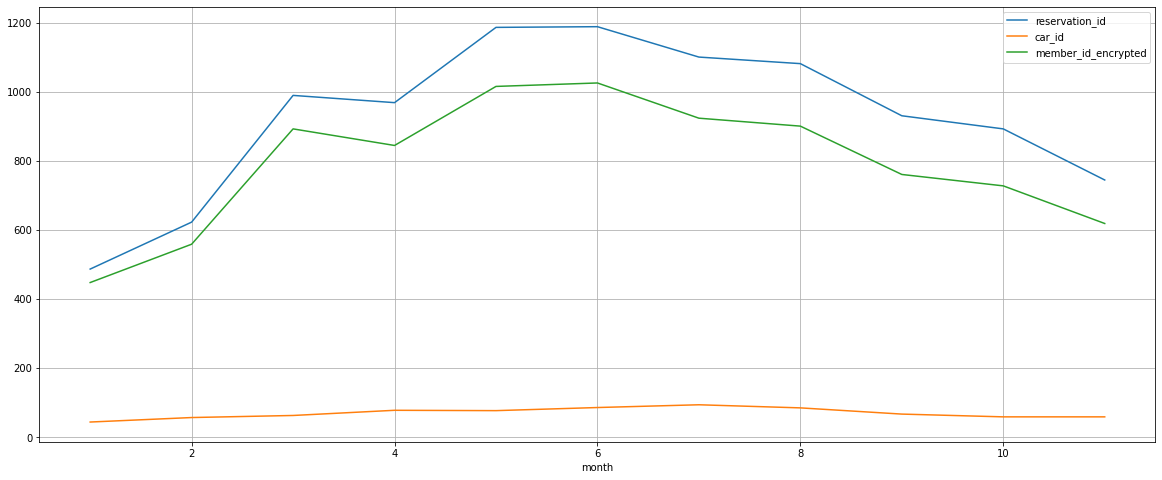

In [ ]:
unique_m_df[unique_m_df['zone_name'] == 'SK주차장'].set_index('month').plot(grid=True, figsize=(20, 8))

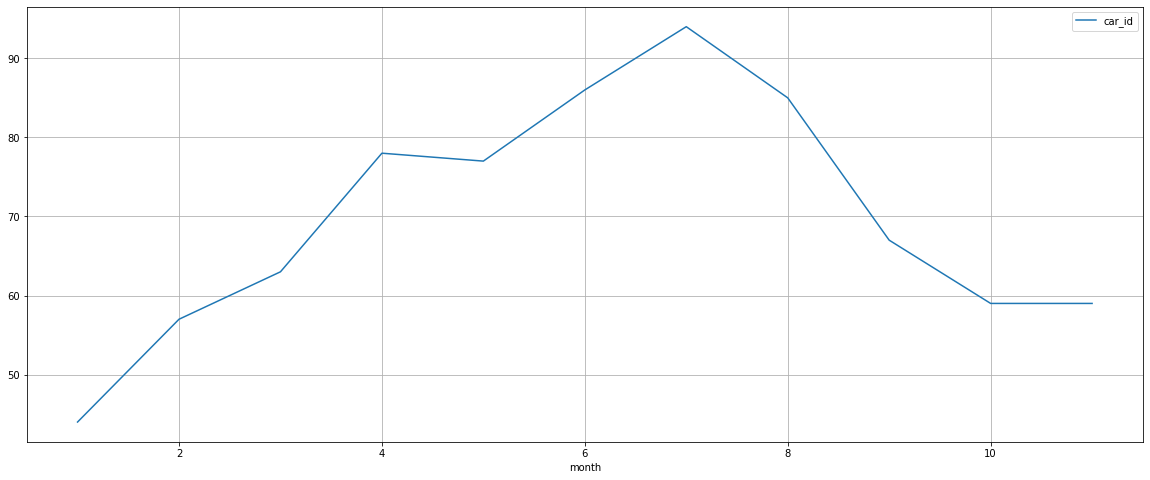

In [ ]:
unique_m_df[unique_m_df['zone_name'] == 'SK주차장'].set_index('month')[['car_id']].plot(grid=True, figsize=(20, 8))

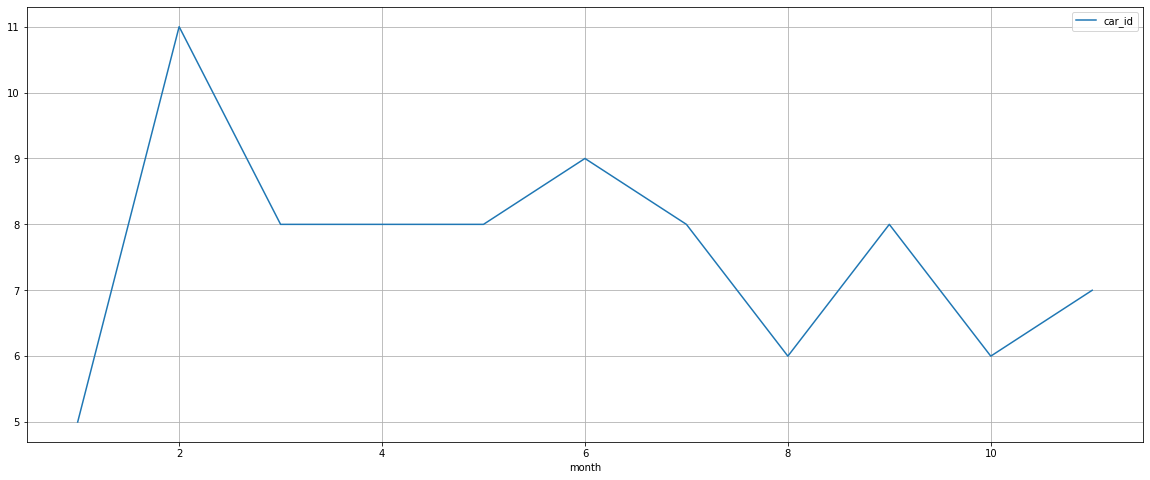

In [ ]:
unique_m_df[unique_m_df['zone_name'] == '88주차장'].set_index('month')[['car_id']].plot(grid=True, figsize=(20, 8))

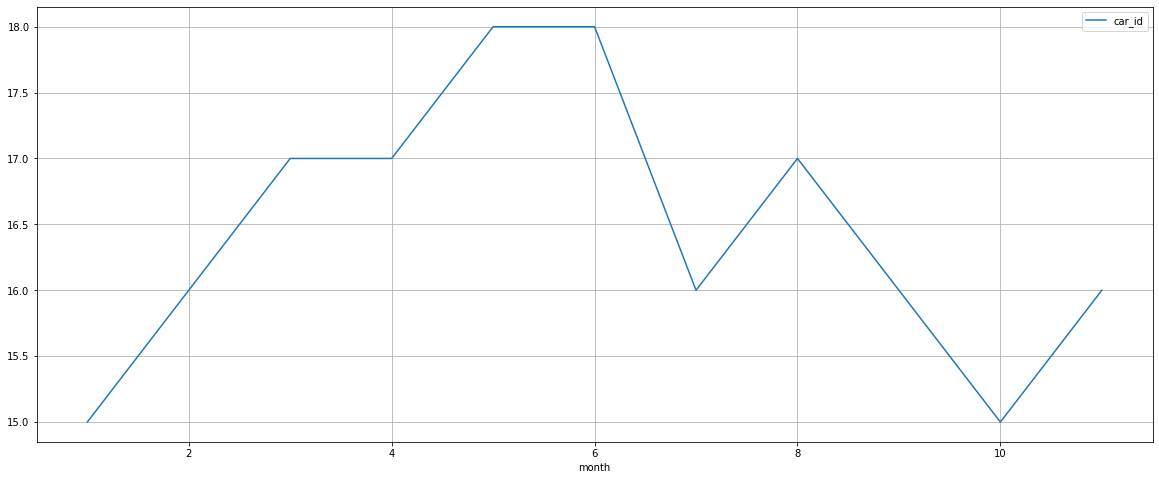

In [ ]:
unique_m_df[unique_m_df['zone_name'] == 'SJ등촌골프연습장 주차장'].set_index('month')[['car_id']].plot(grid=True, figsize=(20, 8))

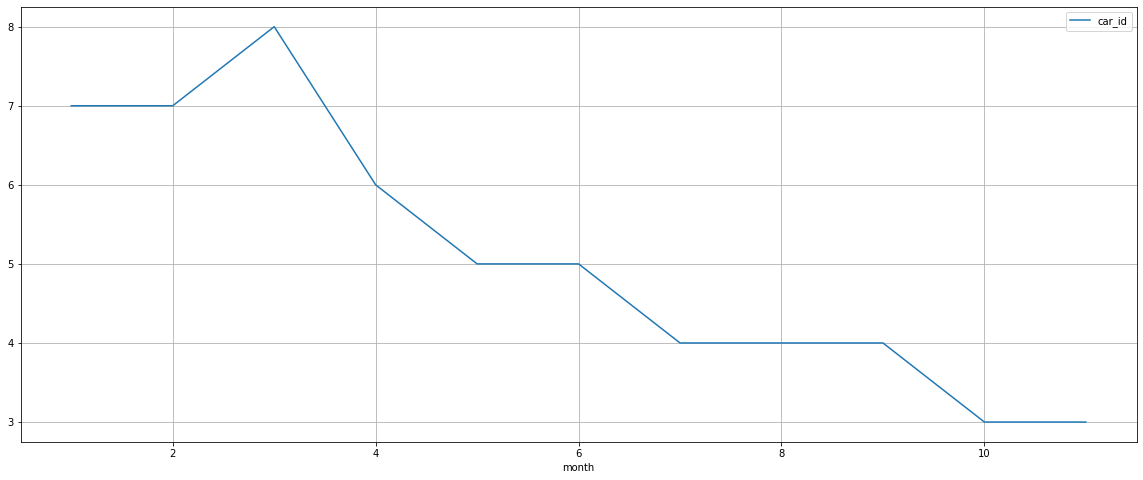

In [ ]:
unique_m_df[unique_m_df['zone_name'] == 'AJ파크 논현점'].set_index('month')[['car_id']].plot(grid=True, figsize=(20, 8))

In [ ]:
unique_by_group_w = data.groupby(['zone_name', 'week']).nunique()[['reservation_id', 'car_id', 'member_id_encrypted']]

In [ ]:
unique_w_df = unique_by_group_w.reset_index().sort_values(['zone_name', 'week'])
unique_w_df

,zone_name,week,reservation_id,car_id,member_id_encrypted
0,(주) 동성 주차장,47,1,1,1
1,1307동 옆 지하주차장,1,11,2,8
2,1307동 옆 지하주차장,2,19,2,12
3,1307동 옆 지하주차장,3,12,2,11
4,1307동 옆 지하주차장,4,17,2,14
...,...,...,...,...,...
41088,힐스테이트판교모비우스오피스텔(운영종료),13,5,1,4
41089,힐스테이트판교모비우스오피스텔(운영종료),14,2,1,1
41090,힐스테이트판교모비우스오피스텔(운영종료),15,3,1,2
41091,힐스테이트판교모비우스오피스텔(운영종료),16,2,1,2


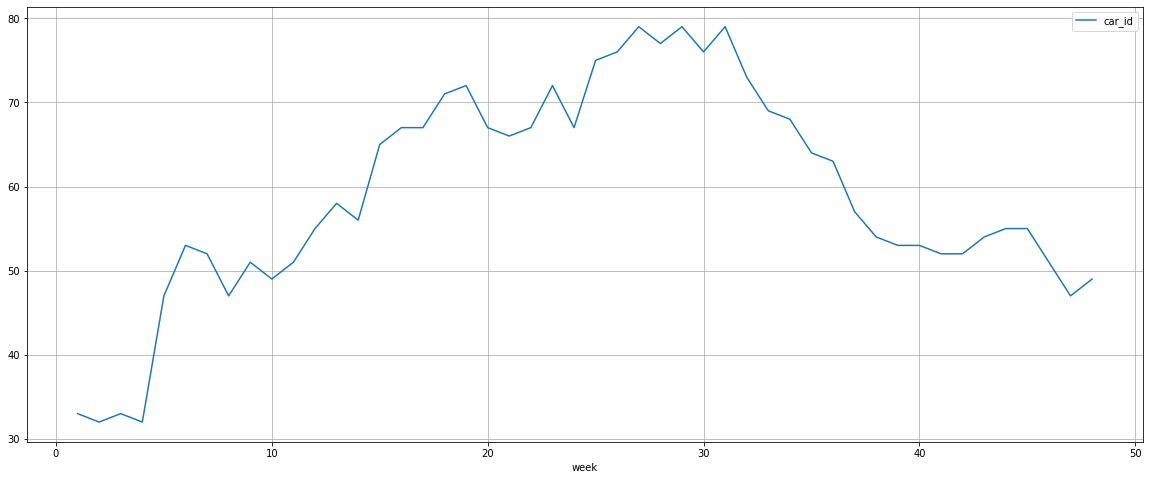

In [ ]:
unique_w_df[unique_w_df['zone_name'] == 'SK주차장'].set_index('week')[['car_id']].plot(grid=True, figsize=(20, 8))

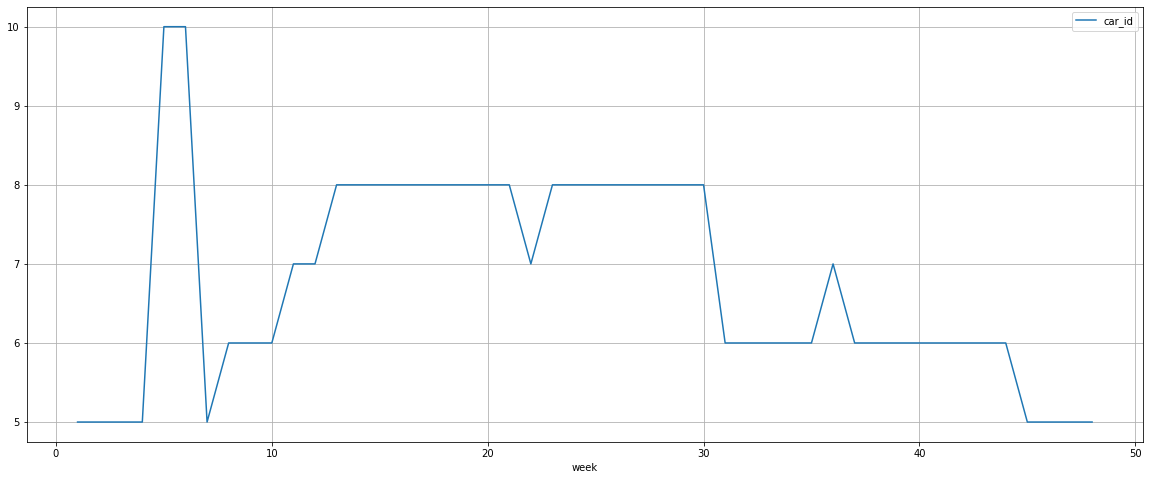

In [ ]:
unique_w_df[unique_w_df['zone_name'] == '88주차장'].set_index('week')[['car_id']].plot(grid=True, figsize=(20, 8))

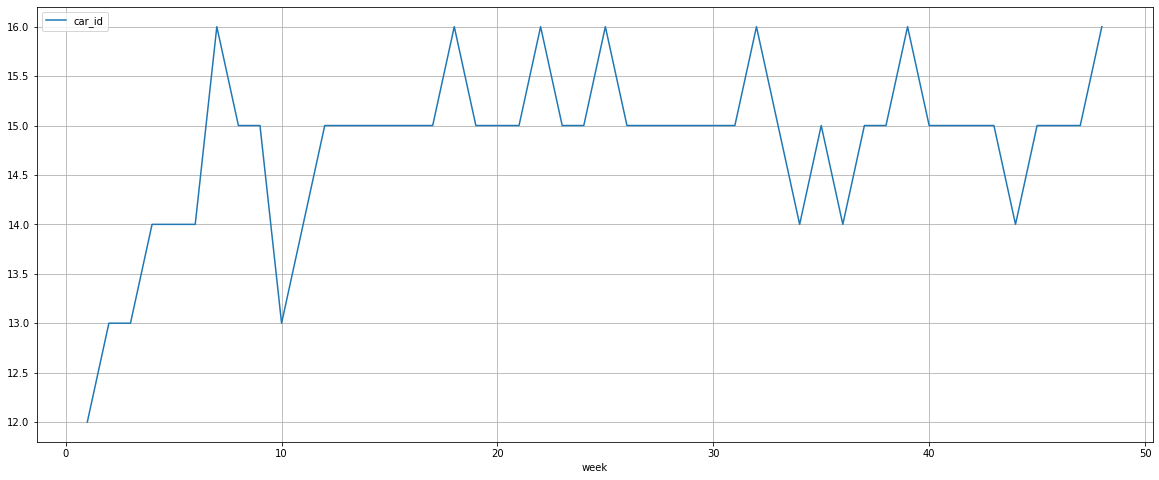

In [ ]:
unique_w_df[unique_w_df['zone_name'] == 'SJ등촌골프연습장 주차장'].set_index('week')[['car_id']].plot(grid=True, figsize=(20, 8))

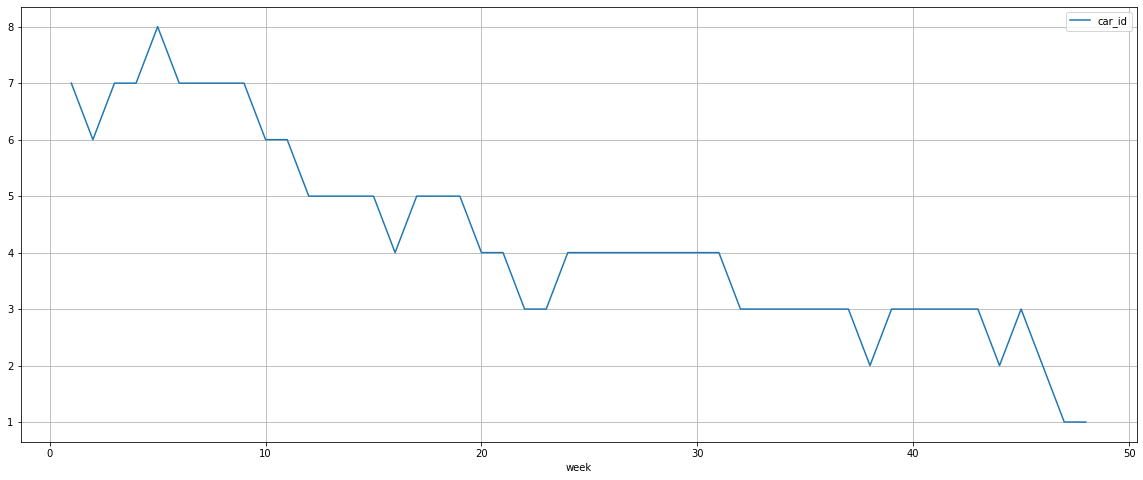

In [ ]:
unique_w_df[unique_w_df['zone_name'] == 'AJ파크 논현점'].set_index('week')[['car_id']].plot(grid=True, figsize=(20, 8))

In [ ]:
unique_d_df = data.set_index('reservation_start_at').groupby(['zone_name']).resample('W').nunique()[['reservation_id', 'car_id', 'member_id_encrypted']]

In [ ]:
unique_d_df = unique_d_df.reset_index()

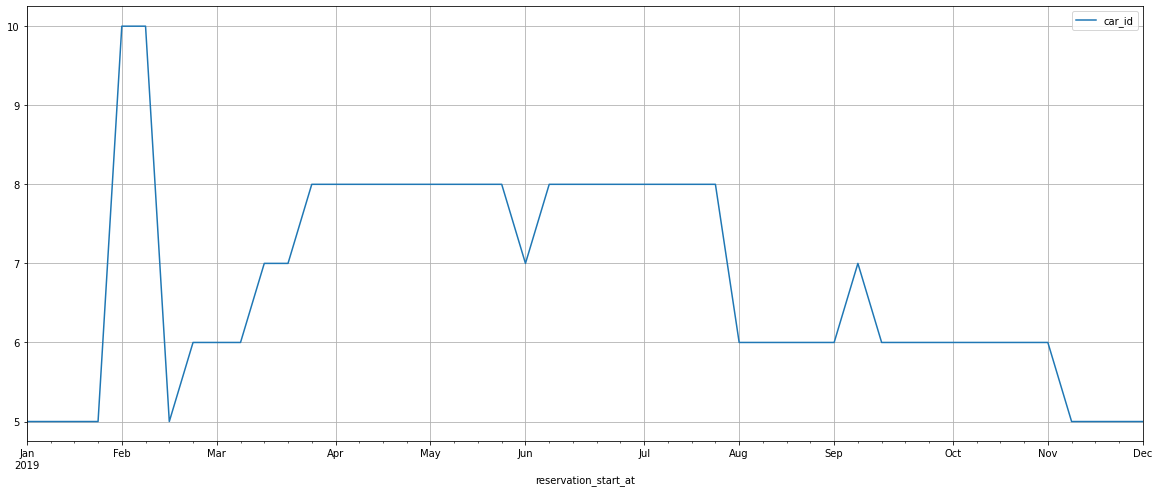

In [ ]:
unique_d_df[unique_d_df['zone_name'] == '88주차장'].set_index('reservation_start_at')[['car_id']].plot(grid=True, figsize=(20, 8))

In [ ]:
zone_op = data.groupby('zone_name').agg({"reservation_start_at": "min", "reservation_return_at": "max"}).reset_index()
zone_op['days'] = (zone_op['reservation_return_at'] - zone_op['reservation_start_at']).dt.days
zone_op['closed'] = False
zone_op

,zone_name,reservation_start_at,reservation_return_at,days,closed
0,(주) 동성 주차장,2019-11-18 12:20:00,2019-11-18 15:38:45,0,False
1,1307동 옆 지하주차장,2019-01-01 14:00:00,2019-11-30 18:29:04,333,False
2,2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,False
3,2생활권환승주차장A 주차장,2018-12-31 21:30:00,2019-11-30 18:29:50,333,False
4,3번출구 앞 환승주차장,2019-04-16 19:00:00,2019-11-30 19:53:51,228,False
...,...,...,...,...,...
1240,힐스테이트에코 미사,2018-12-31 22:40:00,2019-11-30 21:15:34,333,False
1241,힐스테이트에코동익 오피스텔 103동,2019-01-01 02:00:00,2019-11-30 21:58:58,333,False
1242,힐스테이트에코마곡나루역 오피스텔,2018-12-31 09:40:00,2019-11-30 23:39:45,334,False
1243,힐스테이트에코마곡나루역오피스텔,2019-03-01 10:30:00,2019-11-30 22:05:05,274,False


In [ ]:
zone_op[zone_op['reservation_return_at'] < pd.to_datetime('2019-10-01 00:00:00')]

,zone_name,reservation_start_at,reservation_return_at,days,closed
2,2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,False
14,AJ파크 장안점(덕원주차장),2018-12-30 07:00:00,2019-08-27 00:50:00,239,False
15,AJ파크 케이탑리츠 화정빌딩점,2019-08-14 08:30:00,2019-08-16 17:36:41,2,False
21,CU 마곡아르디에점(운영종료),2019-01-01 16:10:00,2019-01-16 23:40:00,15,False
22,CU 성남월드점,2018-12-31 21:00:00,2019-09-09 23:56:05,252,False
...,...,...,...,...,...
1219,화성초등학교 옆(샛별한양아파트)(운영종료),2019-01-01 11:00:00,2019-04-08 01:14:14,96,False
1224,화일초등학교 옆(운영종료),2019-01-02 16:10:00,2019-01-29 23:38:23,27,False
1230,효자동 부광연립(운영종료),2019-01-01 13:50:00,2019-05-15 01:24:31,133,False
1234,휘경여자중학교 앞,2018-12-31 23:20:00,2019-09-02 23:45:45,245,False


In [ ]:
zone_op[zone_op['zone_name'].str.contains("운영종료")].count()

zone_name                240
reservation_start_at     240
reservation_return_at    240
days                     240
closed                   240
dtype: int64

In [ ]:
zone_op[(zone_op['reservation_return_at'] < pd.to_datetime('2019-10-01 00:00:00')) & zone_op['zone_name'].str.contains("운영종료")]

,zone_name,reservation_start_at,reservation_return_at,days,closed
2,2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,False
21,CU 마곡아르디에점(운영종료),2019-01-01 16:10:00,2019-01-16 23:40:00,15,False
43,KT서울산점 앞(운영종료),2019-01-01 05:10:00,2019-05-23 00:49:26,141,False
45,LH 2단지(이스트힐)(운영종료),2019-01-01 18:10:00,2019-01-02 16:10:00,0,False
62,SK주유소 김포점(운영종료),2019-02-08 11:00:00,2019-09-03 08:09:55,206,False
...,...,...,...,...,...
1218,화성청계초등학교 앞(운영종료),2019-01-01 01:40:00,2019-05-28 13:00:00,147,False
1219,화성초등학교 옆(샛별한양아파트)(운영종료),2019-01-01 11:00:00,2019-04-08 01:14:14,96,False
1224,화일초등학교 옆(운영종료),2019-01-02 16:10:00,2019-01-29 23:38:23,27,False
1230,효자동 부광연립(운영종료),2019-01-01 13:50:00,2019-05-15 01:24:31,133,False


In [ ]:
zone_op.loc[(zone_op['reservation_return_at'] < pd.to_datetime('2019-10-01 00:00:00')) & zone_op['zone_name'].str.contains("운영종료"), 'closed'] = True

In [ ]:
zone_op

,zone_name,reservation_start_at,reservation_return_at,days,closed
0,(주) 동성 주차장,2019-11-18 12:20:00,2019-11-18 15:38:45,0,False
1,1307동 옆 지하주차장,2019-01-01 14:00:00,2019-11-30 18:29:04,333,False
2,2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,True
3,2생활권환승주차장A 주차장,2018-12-31 21:30:00,2019-11-30 18:29:50,333,False
4,3번출구 앞 환승주차장,2019-04-16 19:00:00,2019-11-30 19:53:51,228,False
...,...,...,...,...,...
1240,힐스테이트에코 미사,2018-12-31 22:40:00,2019-11-30 21:15:34,333,False
1241,힐스테이트에코동익 오피스텔 103동,2019-01-01 02:00:00,2019-11-30 21:58:58,333,False
1242,힐스테이트에코마곡나루역 오피스텔,2018-12-31 09:40:00,2019-11-30 23:39:45,334,False
1243,힐스테이트에코마곡나루역오피스텔,2019-03-01 10:30:00,2019-11-30 22:05:05,274,False


In [ ]:
zone_op[(zone_op['days'] > 90)]

,zone_name,reservation_start_at,reservation_return_at,days,closed
1,1307동 옆 지하주차장,2019-01-01 14:00:00,2019-11-30 18:29:04,333,False
3,2생활권환승주차장A 주차장,2018-12-31 21:30:00,2019-11-30 18:29:50,333,False
4,3번출구 앞 환승주차장,2019-04-16 19:00:00,2019-11-30 19:53:51,228,False
5,88주차장,2018-12-31 16:30:00,2019-11-30 23:59:30,334,False
6,AJ파크 금강주차타워,2018-12-31 10:00:00,2019-11-30 17:46:17,334,False
...,...,...,...,...,...
1240,힐스테이트에코 미사,2018-12-31 22:40:00,2019-11-30 21:15:34,333,False
1241,힐스테이트에코동익 오피스텔 103동,2019-01-01 02:00:00,2019-11-30 21:58:58,333,False
1242,힐스테이트에코마곡나루역 오피스텔,2018-12-31 09:40:00,2019-11-30 23:39:45,334,False
1243,힐스테이트에코마곡나루역오피스텔,2019-03-01 10:30:00,2019-11-30 22:05:05,274,False


In [ ]:
zone_op[(zone_op['days'] > 90) & zone_op['closed']]

,zone_name,reservation_start_at,reservation_return_at,days,closed
43,KT서울산점 앞(운영종료),2019-01-01 05:10:00,2019-05-23 00:49:26,141,True
62,SK주유소 김포점(운영종료),2019-02-08 11:00:00,2019-09-03 08:09:55,206,True
68,SK주유소 석수동점(운영종료),2018-12-31 15:40:00,2019-05-21 21:45:19,141,True
88,가양역 1번출구(운영종료),2018-12-31 18:10:00,2019-04-23 01:54:22,112,True
94,가재울초등학교 옆(DMC파크뷰자이1단지)(운영종료),2019-01-01 22:50:00,2019-04-08 22:57:00,97,True
...,...,...,...,...,...
1216,화성봉담2 LH3단지(운영종료),2019-01-02 16:00:00,2019-05-07 19:51:28,125,True
1218,화성청계초등학교 앞(운영종료),2019-01-01 01:40:00,2019-05-28 13:00:00,147,True
1219,화성초등학교 옆(샛별한양아파트)(운영종료),2019-01-01 11:00:00,2019-04-08 01:14:14,96,True
1230,효자동 부광연립(운영종료),2019-01-01 13:50:00,2019-05-15 01:24:31,133,True


In [ ]:
zone_op[zone_op['closed']]

,zone_name,reservation_start_at,reservation_return_at,days,closed
2,2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,True
21,CU 마곡아르디에점(운영종료),2019-01-01 16:10:00,2019-01-16 23:40:00,15,True
43,KT서울산점 앞(운영종료),2019-01-01 05:10:00,2019-05-23 00:49:26,141,True
45,LH 2단지(이스트힐)(운영종료),2019-01-01 18:10:00,2019-01-02 16:10:00,0,True
62,SK주유소 김포점(운영종료),2019-02-08 11:00:00,2019-09-03 08:09:55,206,True
...,...,...,...,...,...
1218,화성청계초등학교 앞(운영종료),2019-01-01 01:40:00,2019-05-28 13:00:00,147,True
1219,화성초등학교 옆(샛별한양아파트)(운영종료),2019-01-01 11:00:00,2019-04-08 01:14:14,96,True
1224,화일초등학교 옆(운영종료),2019-01-02 16:10:00,2019-01-29 23:38:23,27,True
1230,효자동 부광연립(운영종료),2019-01-01 13:50:00,2019-05-15 01:24:31,133,True


In [ ]:
unique_m_df

,zone_name,month,reservation_id,car_id,member_id_encrypted
0,(주) 동성 주차장,11,1,1,1
1,1307동 옆 지하주차장,1,67,2,31
2,1307동 옆 지하주차장,2,67,2,38
3,1307동 옆 지하주차장,3,58,2,31
4,1307동 옆 지하주차장,4,87,2,60
...,...,...,...,...,...
9739,힐스테이트에코마곡나루역오피스텔,11,44,1,39
9740,힐스테이트판교모비우스오피스텔(운영종료),1,12,1,5
9741,힐스테이트판교모비우스오피스텔(운영종료),2,13,1,7
9742,힐스테이트판교모비우스오피스텔(운영종료),3,15,1,6


In [ ]:
zone_unique_car_per_month = unique_m_df.pivot_table('car_id', ['zone_name'], 'month').reset_index().fillna(0).set_index('zone_name').astype(int).reset_index() #.drop('month', axis=1)
zone_unique_car_per_month

month,zone_name,1,2,3,4,5,6,7,8,9,10,11
0,(주) 동성 주차장,0,0,0,0,0,0,0,0,0,0,1
1,1307동 옆 지하주차장,2,2,2,2,2,2,2,2,2,2,2
2,2001아울렛 안양점 앞(운영종료),0,1,1,0,0,0,0,0,0,0,0
3,2생활권환승주차장A 주차장,1,1,1,2,2,2,2,2,2,2,2
4,3번출구 앞 환승주차장,0,0,0,1,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1240,힐스테이트에코 미사,2,2,2,2,2,2,2,2,1,1,1
1241,힐스테이트에코동익 오피스텔 103동,4,3,3,2,2,2,2,2,3,4,3
1242,힐스테이트에코마곡나루역 오피스텔,12,11,14,13,11,9,11,11,11,9,8
1243,힐스테이트에코마곡나루역오피스텔,0,0,1,1,1,1,1,1,1,1,1


In [ ]:
zone_info_df = zone_op.set_index('zone_name').join(zone_unique_car_per_month.set_index('zone_name'), how="inner")
zone_info_df

,reservation_start_at,reservation_return_at,days,closed,1,2,3,4,5,6,7,8,9,10,11
zone_name,,,,,,,,,,,,,,,
(주) 동성 주차장,2019-11-18 12:20:00,2019-11-18 15:38:45,0,False,0,0,0,0,0,0,0,0,0,0,1
1307동 옆 지하주차장,2019-01-01 14:00:00,2019-11-30 18:29:04,333,False,2,2,2,2,2,2,2,2,2,2,2
2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,True,0,1,1,0,0,0,0,0,0,0,0
2생활권환승주차장A 주차장,2018-12-31 21:30:00,2019-11-30 18:29:50,333,False,1,1,1,2,2,2,2,2,2,2,2
3번출구 앞 환승주차장,2019-04-16 19:00:00,2019-11-30 19:53:51,228,False,0,0,0,1,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
힐스테이트에코 미사,2018-12-31 22:40:00,2019-11-30 21:15:34,333,False,2,2,2,2,2,2,2,2,1,1,1
힐스테이트에코동익 오피스텔 103동,2019-01-01 02:00:00,2019-11-30 21:58:58,333,False,4,3,3,2,2,2,2,2,3,4,3
힐스테이트에코마곡나루역 오피스텔,2018-12-31 09:40:00,2019-11-30 23:39:45,334,False,12,11,14,13,11,9,11,11,11,9,8


In [ ]:
melted_zone_info_df = pd.melt(zone_info_df.reset_index(), id_vars=['zone_name', 'reservation_start_at', 'reservation_return_at', 'days', 'closed'], var_name="month", value_name="n_unique_car")
melted_zone_info_df

,zone_name,reservation_start_at,reservation_return_at,days,closed,month,n_unique_car
0,(주) 동성 주차장,2019-11-18 12:20:00,2019-11-18 15:38:45,0,False,1,0
1,1307동 옆 지하주차장,2019-01-01 14:00:00,2019-11-30 18:29:04,333,False,1,2
2,2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,True,1,0
3,2생활권환승주차장A 주차장,2018-12-31 21:30:00,2019-11-30 18:29:50,333,False,1,1
4,3번출구 앞 환승주차장,2019-04-16 19:00:00,2019-11-30 19:53:51,228,False,1,0
...,...,...,...,...,...,...,...
13690,힐스테이트에코 미사,2018-12-31 22:40:00,2019-11-30 21:15:34,333,False,11,1
13691,힐스테이트에코동익 오피스텔 103동,2019-01-01 02:00:00,2019-11-30 21:58:58,333,False,11,3
13692,힐스테이트에코마곡나루역 오피스텔,2018-12-31 09:40:00,2019-11-30 23:39:45,334,False,11,8
13693,힐스테이트에코마곡나루역오피스텔,2019-03-01 10:30:00,2019-11-30 22:05:05,274,False,11,1


In [ ]:
# zone_info_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "zone_info.csv")
# zone_info_df.to_csv(zone_info_path)

In [ ]:
# melted_zone_info_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "melted_zone_info.csv")
# melted_zone_info_df.to_csv(melted_zone_info_path)

In [ ]:
timeseries['month'] = timeseries['time'].apply(lambda x: x.month)

In [ ]:
timeseries[['n_drive', 'n_drive_unique']] = timeseries[['n_drive', 'n_drive_unique']].astype(int)
timeseries

,time,zone,n_drive,n_drive_unique,month
0,2019-01-01 00:00:00,SK주차장,12,12,1
1,2019-01-01 00:00:00,용정주차장,1,1,1
2,2019-01-01 00:00:00,제일주차장,5,5,1
3,2019-01-01 00:00:00,웨스트엔드 3차,3,3,1
4,2019-01-01 00:00:00,도곡로21길7 공영주차장,2,2,1
...,...,...,...,...,...
3519019,2019-11-30 23:00:00,마곡 747타워,0,0,11
3519020,2019-11-30 23:00:00,우덕빌딩,0,0,11
3519021,2019-11-30 23:00:00,COCOON DONGDUK_A 빌라 주차장,0,0,11
3519022,2019-11-30 23:00:00,래미안강남힐즈 614동,0,0,11


In [ ]:
timeseries_w_info = pd.merge(timeseries, melted_zone_info_df, how='inner', left_on=['zone', 'month'], right_on=['zone_name', 'month'])
timeseries_w_info

,time,zone,n_drive,n_drive_unique,month,zone_name,reservation_start_at,reservation_return_at,days,closed,n_unique_car
0,2019-01-01 00:00:00,SK주차장,12,12,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44
1,2019-01-01 01:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44
2,2019-01-01 02:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44
3,2019-01-01 03:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44
4,2019-01-01 04:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44
...,...,...,...,...,...,...,...,...,...,...,...
3511003,2019-11-30 19:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0
3511004,2019-11-30 20:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0
3511005,2019-11-30 21:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0
3511006,2019-11-30 22:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0


In [ ]:
# timeseries_w_info_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "timeseries_w_info.csv")
# timeseries_w_info.to_csv(timeseries_w_info_path)

In [ ]:
timeseries_w_info["remaining"] = timeseries_w_info["n_unique_car"] - timeseries_w_info["n_drive_unique"]
timeseries_w_info

,time,zone,n_drive,n_drive_unique,month,zone_name,reservation_start_at,reservation_return_at,days,closed,n_unique_car,remaining
0,2019-01-01 00:00:00,SK주차장,12,12,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,32
1,2019-01-01 01:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
2,2019-01-01 02:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
3,2019-01-01 03:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
4,2019-01-01 04:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
...,...,...,...,...,...,...,...,...,...,...,...,...
3511003,2019-11-30 19:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0
3511004,2019-11-30 20:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0
3511005,2019-11-30 21:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0
3511006,2019-11-30 22:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0


In [ ]:
timeseries_w_info[timeseries_w_info['time'] < pd.to_datetime("2019-10-01 00:00:00")].set_index('time').groupby('zone').resample('W').min().drop(['zone'], axis=1).reset_index().pivot_table('remaining', ['time'], 'zone')

zone,88주차장,AJ파크 논현점,AJ파크 장안점(덕원주차장),COCOON DONGDUK_A 빌라 주차장,CU 마곡아르디에점(운영종료),CU 홍은벽산점 옆,D&J 주차장,EAN빌딩,GS파크 대치사거리점,GS파크 삼성점,NC백화점 강서점 주차장,SH공공원룸주택 MJ빌,SH공공원룸주택 씨드하우스3,SI타워,SJ등촌골프연습장 주차장,SK연희기지국 주차장,SK주유소 가양점,SK주유소 광덕점,SK주유소 북악점 주차장,SK주차장,SK허브블루빌딩,THE BAY,URG빌딩,V-PLEX(패스트파이브 삼성2호점),e편한세상 4단지 AJ파크,yesAPM주차장,가양4단지아파트 주차장,가양아파트 310동 우측,가양역 10번출구(등촌주공11단지),가양역 1번출구(운영종료),가양역 2번출구,가자 실내낚시터 주차장,가재울초등학교 옆(DMC파크뷰자이1단지)(운영종료),가좌삼거리,가좌역 3번출구(운영종료),감리교신학대학교,갑을명가상가,강남LH3단지 311동,강남구청역 3번출구(카사빌라),강남블루지움,...,한신한진아파트 211동 앞,한신한진아파트(운영종료),한티역 2번출구(메밀연가)(운영종료),한티역 8번출구(볼트EV 부름스테이션),해담하우스 나동,행복유료주차장,현대그린아파트,현대백화점 무역센터점 별관주차장,현대백화점 미아점 별관 주차장,현대비전21,현대아파트 101동,현대인텔렉스,현대주차장,호텔뉴브,호텔데님,호텔선샤인,홍제1동(1지구)견인보관소,홍제비콘드림힐아파트 주차장,홍제주차장,화곡 본-1 공영주차장,화곡1-1 공영주차장,화곡3-1 공영주차장,화곡4동 주민센터 옆,화곡6-1 공영주차장,화곡7-1 공영주차장,화곡본-2 공영주차장,화곡역 3번출구(운영종료),화곡역(운영종료),화성빌라(나동) 주차장,화신주차장,화이트빌,화일주차장,화일초등학교 옆(운영종료),회기역 1번출구 빌라주차장,회기역(베라체캠퍼스),휘경여자중학교 앞,힐스테이트상가,힐스테이트에코동익 오피스텔 103동,힐스테이트에코마곡나루역 오피스텔,힐스테이트에코마곡나루역오피스텔
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-06,0,2,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,27,5,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,2,0,0,0,...,0,0,3,0,0,0,0,1,1,0,0,0,1,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,1,0
2019-01-13,1,3,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,0,23,6,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,4,0,0,0,...,0,0,2,0,0,0,0,1,1,0,0,0,2,0,0,4,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,4,0
2019-01-20,1,2,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,26,5,0,0,1,1,0,1,0,0,0,0,1,0,2,0,1,3,0,0,0,...,0,0,2,0,0,0,0,1,1,0,0,0,2,0,0,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,6,0,5,0
2019-01-27,0,2,0,0,1,0,1,0,0,0,0,0,0,0,3,0,0,0,0,24,6,0,0,0,0,0,1,0,0,0,0,1,0,2,1,1,3,0,0,0,...,0,0,2,0,0,0,0,1,0,1,0,0,1,0,0,2,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,4,0,2,0
2019-02-03,1,2,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,21,4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,2,0,1,0,0,1,0,0,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,1,0
2019-02-10,1,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,2,10,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0
2019-02-17,6,3,0,0,0,0,0,1,0,0,0,0,0,0,8,0,0,0,1,29,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,1,0,0,...,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0
2019-02-24,5,2,2,0,0,0,0,1,0,0,0,0,0,0,7,0,0,0,1,31,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0
2019-03-03,2,3,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,29,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0


In [ ]:
pct_corr = timeseries_w_info[timeseries_w_info['time'] < pd.to_datetime("2019-10-01 00:00:00")].set_index('time').groupby('zone').resample('W').min().drop(['zone'], axis=1).reset_index().pivot_table('remaining', ['time'], 'zone').corr() #.pct_change().corr()
pct_corr

zone,88주차장,AJ파크 논현점,AJ파크 장안점(덕원주차장),COCOON DONGDUK_A 빌라 주차장,CU 마곡아르디에점(운영종료),CU 홍은벽산점 옆,D&J 주차장,EAN빌딩,GS파크 대치사거리점,GS파크 삼성점,NC백화점 강서점 주차장,SH공공원룸주택 MJ빌,SH공공원룸주택 씨드하우스3,SI타워,SJ등촌골프연습장 주차장,SK연희기지국 주차장,SK주유소 가양점,SK주유소 광덕점,SK주유소 북악점 주차장,SK주차장,SK허브블루빌딩,THE BAY,URG빌딩,V-PLEX(패스트파이브 삼성2호점),e편한세상 4단지 AJ파크,yesAPM주차장,가양4단지아파트 주차장,가양아파트 310동 우측,가양역 10번출구(등촌주공11단지),가양역 1번출구(운영종료),가양역 2번출구,가자 실내낚시터 주차장,가재울초등학교 옆(DMC파크뷰자이1단지)(운영종료),가좌삼거리,가좌역 3번출구(운영종료),감리교신학대학교,갑을명가상가,강남LH3단지 311동,강남구청역 3번출구(카사빌라),강남블루지움,...,한신한진아파트 211동 앞,한신한진아파트(운영종료),한티역 2번출구(메밀연가)(운영종료),한티역 8번출구(볼트EV 부름스테이션),해담하우스 나동,행복유료주차장,현대그린아파트,현대백화점 무역센터점 별관주차장,현대백화점 미아점 별관 주차장,현대비전21,현대아파트 101동,현대인텔렉스,현대주차장,호텔뉴브,호텔데님,호텔선샤인,홍제1동(1지구)견인보관소,홍제비콘드림힐아파트 주차장,홍제주차장,화곡 본-1 공영주차장,화곡1-1 공영주차장,화곡3-1 공영주차장,화곡4동 주민센터 옆,화곡6-1 공영주차장,화곡7-1 공영주차장,화곡본-2 공영주차장,화곡역 3번출구(운영종료),화곡역(운영종료),화성빌라(나동) 주차장,화신주차장,화이트빌,화일주차장,화일초등학교 옆(운영종료),회기역 1번출구 빌라주차장,회기역(베라체캠퍼스),휘경여자중학교 앞,힐스테이트상가,힐스테이트에코동익 오피스텔 103동,힐스테이트에코마곡나루역 오피스텔,힐스테이트에코마곡나루역오피스텔
zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
88주차장,1.000000,0.389394,-0.150625,NaN,-0.133923,-0.064482,-0.077200,6.504947e-01,NaN,0.223205,-0.154880,-0.278783,NaN,NaN,0.405264,NaN,-0.014880,-0.238149,0.283899,0.016148,0.221454,-0.062353,0.072792,-0.042799,0.291388,-0.149369,-0.035123,NaN,-0.106596,NaN,0.185856,0.124180,-0.191872,0.008119,-0.133923,-0.178892,0.370569,0.405063,1.548797e-01,NaN,...,0.223205,-0.133923,-0.093485,-0.167586,0.021074,0.030976,NaN,-0.029135,0.028603,-0.097023,-0.021319,0.044102,-0.216545,NaN,-0.058190,-0.061760,-0.147518,0.490339,0.156177,-0.238149,NaN,-0.014880,NaN,0.223205,0.223205,NaN,NaN,NaN,0.021074,-0.278783,-0.195187,-0.177306,-0.133923,-0.182416,0.143765,0.278783,0.234755,0.114664,0.255901,NaN
AJ파크 논현점,0.389394,1.000000,0.096040,NaN,0.051614,0.137637,-0.363408,4.029115e-02,NaN,-0.077421,-0.094013,-0.342475,NaN,NaN,0.437189,NaN,0.180649,-0.137674,-0.254975,-0.204249,0.259948,-0.047017,-0.007426,-0.063623,-0.135542,-0.358261,0.121829,NaN,-0.110921,NaN,0.110801,-0.021537,-0.018487,0.161932,0.051614,-0.214222,0.459693,0.073947,7.118103e-01,NaN,...,-0.077421,-0.077421,0.201267,-0.367130,-0.426401,-0.094013,NaN,0.440973,0.041338,0.015297,-0.018487,-0.290644,0.162004,NaN,0.007763,0.257065,-0.182743,0.351250,0.022843,-0.137674,NaN,-0.077421,NaN,-0.077421,-0.077421,NaN,NaN,NaN,0.304572,-0.161165,-0.033851,-0.290418,0.051614,-0.186097,-0.226665,-0.094013,0.537144,0.091782,0.496393,NaN
AJ파크 장안점(덕원주차장),-0.150625,0.096040,1.000000,NaN,-0.076338,0.432583,-0.169733,-4.410650e-18,NaN,-0.076338,-0.158910,0.536323,NaN,NaN,-0.049501,NaN,-0.076338,0.045249,-0.104031,0.365648,-0.193966,0.542400,-0.153766,0.031367,-0.197995,-0.244558,-0.108112,NaN,-0.109370,NaN,0.536323,-0.127412,0.765588,-0.041652,-0.076338,0.218509,0.066009,-0.109370,7.718638e-18,NaN,...,-0.076338,0.534367,-0.049613,-0.135748,-0.180187,-0.158910,NaN,0.584269,-0.146735,-0.135748,-0.109370,-0.135748,-0.108912,NaN,-0.160743,0.240796,-0.036037,0.218739,-0.028959,0.045249,NaN,-0.076338,NaN,-0.076338,-0.076338,NaN,NaN,NaN,-0.108112,0.317821,0.667557,-0.101067,-0.076338,-0.220193,-0.111748,-0.158910,0.313730,-0.045249,0.080884,NaN
COCOON DONGDUK_A 빌라 주차장,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CU 마곡아르디에점(운영종료),-0.133923,0.051614,-0.076338,NaN,1.000000,-0.111111,0.323063,-5.337605e-02,NaN,-0.025641,-0.053376,-0.080064,NaN,NaN,-0.066508,NaN,-0.025641,-0.045596,-0.069886,-0.079639,0.307140,-0.070071,-0.051648,-0.073750,-0.069829,-0.082144,0.423659,NaN,-0.036736,NaN,-0.080064,0.385164,-0.036736,0.461685,1.000000,0.161468,0.070949,-0.036736,-5.337605e-02,NaN,...,-0.025641,-0.025641,0.372171,-0.045596,-0.060523,-0.053376,NaN,-0.013692,-0.082144,0.562352,-0.036736,-0.045596,0.212177,NaN,-0.1002

In [ ]:
s_i = pct_corr['AJ파크 논현점']
s_i[s_i < -0.3]

zone
D&J 주차장                            -0.363408
SH공공원룸주택 MJ빌                       -0.342475
yesAPM주차장                          -0.358261
강동주차장 주차타워                         -0.389770
거주자우선주차구역 (연희동(2지구) 046-03)        -0.493567
거주자우선주차구역 (홍제1동(1지구) 051-20)       -0.429772
명문막국수 주차장                          -0.426401
발산파크프라자                            -0.350712
석계역 4번출구(운영종료)                     -0.367130
신촌1공영주차장 (신촌동(2지구)공영 1-12, 1-13)   -0.426401
신촌푸르지오 2단지                         -0.429772
조이전농프라자                            -0.312256
학동포스트빌                             -0.509150
한티역 8번출구(볼트EV 부름스테이션)              -0.367130
해담하우스 나동                           -0.426401
Name: AJ파크 논현점, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_

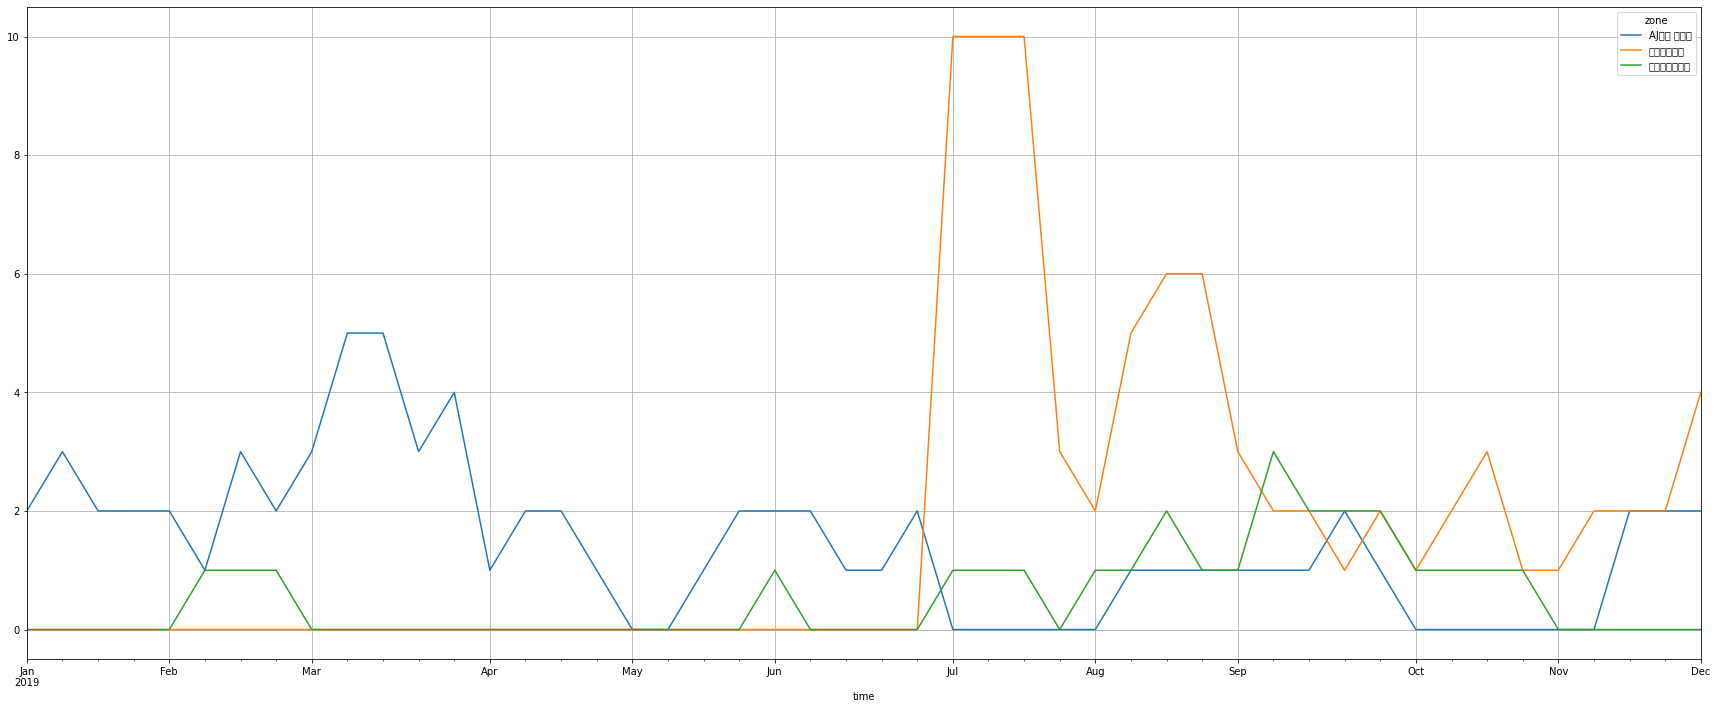

In [ ]:
timeseries_w_info.set_index('time').groupby('zone').resample('W').min().drop(['zone'], axis=1).reset_index().pivot_table('remaining', ['time'], 'zone')[['AJ파크 논현점', '학동포스트빌', '조이전농프라자']].plot(grid=True, figsize=(30, 12))

In [ ]:
zone_info_df[zone_info_df.index == '나이스파크 주차장 신촌역사']

,reservation_start_at,reservation_return_at,days,closed,1,2,3,4,5,6,7,8,9,10,11
zone_name,,,,,,,,,,,,,,,
나이스파크 주차장 신촌역사,2019-06-07 21:00:00,2019-11-30 21:42:46,176,False,0,0,0,0,0,3,4,4,4,4,4


In [ ]:
cluster_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "zone_cluster_id.csv")
cluster_df = pd.read_csv(cluster_path)

In [ ]:
cluster_df = cluster_df.drop(["Unnamed: 0", "n_drive_avg", "zone_lat", "zone_lng"], axis=1)
cluster_df

,zone,growth,cluster_id,zone_drive_hours
0,코엑스 옥상주차장,2.0,1,79687.0
1,롯데백화점 청량리점 주차장,2.0,1,9354.0
2,호텔뉴브,2.0,0,1532.0
3,외대앞역 공영주차빌딩 옥외주차장,2.0,1,21985.0
4,발산파크프라자,2.0,1,67176.0
...,...,...,...,...
433,서울 아현역 1번출구[V],-1.0,3,31874.0
434,SK주차장,-1.0,3,166714.0
435,발산역 9번출구,-1.0,3,24115.0
436,회기역(베라체캠퍼스),-1.0,3,12727.0


In [ ]:
seoul_data = data[data["region"].str.contains("서울")]
seoul_data["reservation_return_at"] = pd.to_datetime(seoul_data["reservation_return_at"])
seoul_data["reservation_start_at"] = pd.to_datetime(seoul_data["reservation_start_at"])
seoul_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip,month,week
0,19600422,8352,6qA1i9+DXTJYgfWPqSGhszRpgNkUzFATBTG4XG7OciA=,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,2016-12-10,2277.0,False,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1
4,19728911,8809,gdP+78Hhm+MZ4ZxIm8kNVvMNzKJBxbiDfBsflsMcwLA=,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,2017-08-13,2658.0,False,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN,NaN,1,1
5,19736553,11030,QC0bcULiIjIaUq+C+0meIx+XFzDRCDGgdi24wO3w5eo=,서울특별시 강남구,2019-01-01 17:32:30,2018-12-29 15:00:00,28,male,2016-03-13,3398.0,False,그랜저IG (LPG),제일주차장,서울 강남구 대치동 1000-6,37.507687,127.066147,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,NaN,NaN,NaN,1,1
7,19753691,13056,7dux47JcwKUjvwLd0EJsFU4lYuiR2IxlSQzgRclvlac=,서울특별시 강서구,2019-01-01 16:17:40,2019-01-01 12:00:00,26,male,2016-08-09,1655.0,False,클리오,웨스트엔드 3차,서울 강서구 내발산동 750-10,37.553017,126.826775,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN,NaN,1,1
9,19765874,11437,9+D2izvRSnkRWLWjrIGiEVcFkxH6GZ/fZmMj7tEE6s8=,서울특별시 강서구,2019-01-03 19:51:13,2019-01-03 18:10:00,32,NaN,2016-10-25,92.0,False,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751535,25230699,11322,ai+thegQFBML9HXa9WOcxqcrO10TnjIXeIWk/sEBXQo=,서울특별시 동대문구,2019-08-16 21:03:39,2019-08-16 11:00:00,26,male,2018-06-01,1508.0,False,더뉴레이,이문동 웰츠타워,서울 동대문구 이문동 292-10,37.598822,127.062179,LIVING_VILLA,LIVING_ETC,NaN,NaN,NaN,"인천광역시 강화군,인천광역시 강화군,인천광역시 강화군,인천광역시 강화군",8,33
751543,25230734,12133,EfUz3ev4ykYFkJ6t4Eg4ML5fkur2s8Rg/LqDEdZTxpo=,서울특별시 성북구,2019-08-16 17:58:45,2019-08-16 14:50:00,27,male,2019-06-09,4756.0,True,미니클럽맨,서울 돌곶이역[V],서울 성북구 석관동 245-4,37.610798,127.058172,NaN,NaN,NaN,NaN,NaN,NaN,8,33
751545,25230740,18217,DBVfEBiHB2Fq4PgtorxeD6SKjkvP+yeofER1mjQ6OD0=,서울특별시 강남구,2019-08-16 00:39:36,2019-08-15 22:00:00,28,male,2015-06-10,9080.0,False,더뉴레이,대승주차장,서울 강남구 대치동 984-12,37.500908,127.066643,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,NaN,NaN,서울특별시 노원구,8,33
751546,25230763,8420,2akRtQ2yPc0zFkPX1EGe72+tJPXrOhFKHmlOiwiwYY0=,서울특별시 강서구,2019-08-16 04:39:18,2019-08-15 21:40:00,21,male,2016-08-04,932.0,False,넥스트스파크,삼영주차장,서울 강서구 화곡동 110-65,37.543930,126.843872,LIVING_VILLA,LIVING_ETC,ETC,NaN,NaN,"인천광역시 중구,서울특별시 강서구,서울특별시 영등포구,서울특별시 강서구",8,33


In [ ]:
seoul_data["duration_m"] = (seoul_data["reservation_return_at"] - seoul_data["reservation_start_at"]).dt.seconds / 60
seoul_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip,month,week,duration_m
0,19600422,8352,6qA1i9+DXTJYgfWPqSGhszRpgNkUzFATBTG4XG7OciA=,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,2016-12-10,2277.0,False,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1,3.700000
4,19728911,8809,gdP+78Hhm+MZ4ZxIm8kNVvMNzKJBxbiDfBsflsMcwLA=,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,2017-08-13,2658.0,False,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN,NaN,1,1,366.050000
5,19736553,11030,QC0bcULiIjIaUq+C+0meIx+XFzDRCDGgdi24wO3w5eo=,서울특별시 강남구,2019-01-01 17:32:30,2018-12-29 15:00:00,28,male,2016-03-13,3398.0,False,그랜저IG (LPG),제일주차장,서울 강남구 대치동 1000-6,37.507687,127.066147,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,NaN,NaN,NaN,1,1,152.500000
7,19753691,13056,7dux47JcwKUjvwLd0EJsFU4lYuiR2IxlSQzgRclvlac=,서울특별시 강서구,2019-01-01 16:17:40,2019-01-01 12:00:00,26,male,2016-08-09,1655.0,False,클리오,웨스트엔드 3차,서울 강서구 내발산동 750-10,37.553017,126.826775,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN,NaN,1,1,257.666667
9,19765874,11437,9+D2izvRSnkRWLWjrIGiEVcFkxH6GZ/fZmMj7tEE6s8=,서울특별시 강서구,2019-01-03 19:51:13,2019-01-03 18:10:00,32,NaN,2016-10-25,92.0,False,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1,101.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751535,25230699,11322,ai+thegQFBML9HXa9WOcxqcrO10TnjIXeIWk/sEBXQo=,서울특별시 동대문구,2019-08-16 21:03:39,2019-08-16 11:00:00,26,male,2018-06-01,1508.0,False,더뉴레이,이문동 웰츠타워,서울 동대문구 이문동 292-10,37.598822,127.062179,LIVING_VILLA,LIVING_ETC,NaN,NaN,NaN,"인천광역시 강화군,인천광역시 강화군,인천광역시 강화군,인천광역시 강화군",8,33,603.650000
751543,25230734,12133,EfUz3ev4ykYFkJ6t4Eg4ML5fkur2s8Rg/LqDEdZTxpo=,서울특별시 성북구,2019-08-16 17:58:45,2019-08-16 14:50:00,27,male,2019-06-09,4756.0,True,미니클럽맨,서울 돌곶이역[V],서울 성북구 석관동 245-4,37.610798,127.058172,NaN,NaN,NaN,NaN,NaN,NaN,8,33,188.750000
751545,25230740,18217,DBVfEBiHB2Fq4PgtorxeD6SKjkvP+yeofER1mjQ6OD0=,서울특별시 강남구,2019-08-16 00:39:36,2019-08-15 22:00:00,28,male,2015-06-10,9080.0,False,더뉴레이,대승주차장,서울 강남구 대치동 984-12,37.500908,127.066643,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,NaN,NaN,서울특별시 노원구,8,33,159.600000
751546,25230763,8420,2akRtQ2yPc0zFkPX1EGe72+tJPXrOhFKHmlOiwiwYY0=,서울특별시 강서구,2019-08-16 04:39:18,2019-08-15 21:40:00,21,male,2016-08-04,932.0,False,넥스트스파크,삼영주차장,서울 강서구 화곡동 110-65,37.543930,126.843872,LIVING_VILLA,LIVING_ETC,ETC,NaN,NaN,"인천광역시 중구,서울특별시 강서구,서울특별시 영등포구,서울특별시 강서구",8,33,419.300000


In [ ]:
seoul_data = pd.merge(seoul_data, cluster_df, how='inner', left_on=['zone_name'], right_on=['zone'])
seoul_data = pd.merge(seoul_data, zone_op[["zone_name", "closed"]], how='inner', left_on=['zone_name'], right_on=['zone_name'])
seoul_data

,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip,month,week,duration_m,zone,growth,cluster_id,zone_drive_hours,closed
0,19600422,8352,6qA1i9+DXTJYgfWPqSGhszRpgNkUzFATBTG4XG7OciA=,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,2016-12-10,2277.0,False,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1,3.700000,SK주차장,-1.000000,3,166714.0,False
1,19765874,11437,9+D2izvRSnkRWLWjrIGiEVcFkxH6GZ/fZmMj7tEE6s8=,서울특별시 강서구,2019-01-03 19:51:13,2019-01-03 18:10:00,32,NaN,2016-10-25,92.0,False,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1,101.216667,SK주차장,-1.000000,3,166714.0,False
2,19921594,11845,tDt2gHcs16pDFlRuYoJK1h7j7AIwwOn1m+B48Z/KZDM=,서울특별시 강서구,2019-01-08 14:32:22,2019-01-08 10:20:00,30,male,2016-05-02,1298.0,False,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,2,252.366667,SK주차장,-1.000000,3,166714.0,False
3,20037798,11845,RPpNOW3Y0G59fTMhAv/ymePe9GFDd/JIcdjQYYu2oRU=,서울특별시 강서구,2019-01-13 13:43:10,2019-01-11 11:30:00,28,female,2015-11-01,2504.0,False,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,2,133.166667,SK주차장,-1.000000,3,166714.0,False
4,20042574,9794,q77fGoMU23svbi8LtplwodsKOGztUmcctcsAR2OkhFM=,서울특별시 강서구,2019-01-06 12:25:43,2019-01-03 10:30:00,31,female,2016-06-07,598.0,False,티볼리(경유),SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN,NaN,1,1,115.716667,SK주차장,-1.000000,3,166714.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294290,24736087,14028,/ut9n4NzVSYdBDHx8GiItu62cXyUgJ+Rmd/rgeb9TQw=,서울특별시 강남구,2019-07-28 22:22:34,2019-07-28 06:30:00,25,NaN,2016-03-16,16625.0,False,볼트EV (제주),한티역 8번출구(볼트EV 부름스테이션),서울 강남구 역삼동 756-19,37.497512,127.051576,NaN,NaN,NaN,NaN,NaN,"경기도 가평군,강원도 양양군,강원도 양양군,강원도 인제군,강원도 홍천군",7,30,952.566667,한티역 8번출구(볼트EV 부름스테이션),0.554241,2,218.0,False
294291,24748330,14033,vabHEwhcUCSSi+2IfwG+8w5QHdV0jyAah//QBdLZ7e8=,서울특별시 강남구,2019-07-28 16:56:51,2019-07-28 10:40:00,28,female,2018-08-15,327.0,True,볼트EV (제주),한티역 8번출구(볼트EV 부름스테이션),서울 강남구 역삼동 756-19,37.497512,127.051576,NaN,NaN,NaN,NaN,NaN,인천광역시 서구,7,30,376.850000,한티역 8번출구(볼트EV 부름스테이션),0.554241,2,218.0,False
294292,24755315,14032,th30YU+T4cPD8cvpeg+8AMxazfZWqf8tPqPVPKpCcmw=,서울특별시 강남구,2019-07-29 08:31:13,2019-07-28 09:00:00,49,male,2019-05-04,12904.0,False,볼트EV (제주),한티역 8번출구(볼트EV 부름스테이션),서울 강남구 역삼동 756-19,37.497512,127.051576,NaN,NaN,NaN,NaN,NaN,"서울특별시 강남구,서울특별시 강남구,서울특별시 강남구,서울특별시 강남구,서울특별시 ...",7,31,1411.216667,한티역 8번출구(볼트EV 부름스테이션),0.554241,2,218.0,False
294293,24769157,14036,tNaPu+7h5zU6kjRR25UzcuugkdNAovcYUDOfEOADf8I=,서울특별시 강남구,2019-07-29 01:00:47,2019-07-28 21:00:00,29,male,2017-09-30,1694.0,True,볼트EV (제주),한티역 8번출구(볼트EV 부름스테이션),서울 강남구 역삼동 756-19,37.497512,127.051576,NaN,NaN,NaN,NaN,NaN,인천광역시 중구,7,31,240.783333,한티역 8번출구(볼트EV 부름스테이션),0.554241,2,218.0,False


In [ ]:
seoul_data.groupby("cluster_id").agg({ "duration_m": "sum" })

,duration_m
cluster_id,
0,2.386219e+07
1,3.908763e+07
2,7.269524e+06
3,2.694538e+07


In [ ]:
8.823317e+07 / 60 * 7200

10587980400.0

In [ ]:
seoul_data["duration_m"].sum() / 60 * 7200

11659767463.999998

In [ ]:
seoul_data["duration_m"].mean()

330.1609910690389

In [ ]:
seoul_data[(seoul_data["reservation_start_at"] >= pd.to_datetime("2019-01-01 00:00:00")) & (seoul_data["closed"] == False)].set_index('reservation_start_at').groupby(["zone_name", "car_id"]).resample('M').agg({ "duration_m": "sum" }).mean() # .drop(['zone'], axis=1).reset_index().pivot_table('n_drive_unique', ['time'], 'zone').pct_change().corr()

duration_m    8847.819295
dtype: float64

In [ ]:
seoul_data[(seoul_data["reservation_start_at"] >= pd.to_datetime("2019-01-01 00:00:00")) & (seoul_data["closed"] == True)].set_index('reservation_start_at').groupby(["zone_name", "car_id"]).resample('M').agg({ "duration_m": "sum" }).mean() # .drop(['zone'], axis=1).reset_index().pivot_table('n_drive_unique', ['time'], 'zone').pct_change().corr()

duration_m    5847.261812
dtype: float64

In [ ]:
1.000385e+07 / 60 * 7200

1200462000.0

In [ ]:
3.905053e+04 / 60 * 7200

4686063.600000001

In [ ]:
timeseries_w_info

,time,zone,n_drive,n_drive_unique,month,zone_name,reservation_start_at,reservation_return_at,days,closed,n_unique_car,remaining
0,2019-01-01 00:00:00,SK주차장,12,12,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,32
1,2019-01-01 01:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
2,2019-01-01 02:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
3,2019-01-01 03:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
4,2019-01-01 04:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33
...,...,...,...,...,...,...,...,...,...,...,...,...
3511003,2019-11-30 19:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0
3511004,2019-11-30 20:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0
3511005,2019-11-30 21:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0
3511006,2019-11-30 22:00:00,한티역 8번출구(볼트EV 부름스테이션),0,0,11,한티역 8번출구(볼트EV 부름스테이션),2019-07-26 09:20:00,2019-07-30 08:40:00,3,False,0,0


In [ ]:
timeseries_w_info_cluster = pd.merge(timeseries_w_info, cluster_df, how='inner', left_on=['zone'], right_on=['zone'])
timeseries_w_info_cluster = timeseries_w_info_cluster[(timeseries_w_info_cluster["cluster_id"] == 1) | (timeseries_w_info_cluster["cluster_id"] == 3)]

In [ ]:
timeseries_w_no_remaining = timeseries_w_info_cluster[(timeseries_w_info_cluster["n_unique_car"] > 0) & (timeseries_w_info_cluster["remaining"] == 0)].groupby(['time']).agg({ "zone": "count" })# .reset_index().set_index("time")
timeseries_w_no_remaining

,zone
time,
2019-01-01 00:00:00,11
2019-01-01 01:00:00,8
2019-01-01 02:00:00,7
2019-01-01 03:00:00,7
2019-01-01 04:00:00,8
...,...
2019-11-30 17:00:00,5
2019-11-30 18:00:00,4
2019-11-30 19:00:00,3


In [ ]:
timeseries_w_remaining = timeseries_w_info_cluster[(timeseries_w_info_cluster["n_unique_car"] > 0) & (timeseries_w_info_cluster["remaining"] > 0)].groupby(['time']).sum().reset_index()[["time", "n_unique_car", "remaining"]].set_index("time")
timeseries_w_remaining

,n_unique_car,remaining
time,,
2019-01-01 00:00:00,542,290
2019-01-01 01:00:00,556,310
2019-01-01 02:00:00,558,338
2019-01-01 03:00:00,561,355
2019-01-01 04:00:00,556,363
...,...,...
2019-11-30 19:00:00,637,436
2019-11-30 20:00:00,639,463
2019-11-30 21:00:00,643,502


In [ ]:
joined = timeseries_w_no_remaining.join(timeseries_w_remaining)
joined["n_fully_occupied_zone"] = joined["zone"]
joined = joined.drop("zone", axis=1)
joined

,n_unique_car,remaining,n_fully_occupied_zone
time,,,
2019-01-01 00:00:00,542,290,11
2019-01-01 01:00:00,556,310,8
2019-01-01 02:00:00,558,338,7
2019-01-01 03:00:00,561,355,7
2019-01-01 04:00:00,556,363,8
...,...,...,...
2019-11-30 17:00:00,629,387,5
2019-11-30 18:00:00,634,405,4
2019-11-30 19:00:00,637,436,3


In [ ]:
joined["improvable"] = joined[["n_unique_car", "n_fully_occupied_zone"]].min(axis=1)
joined

,n_unique_car,remaining,n_fully_occupied_zone,improvable
time,,,,
2019-01-01 00:00:00,542,290,11,11
2019-01-01 01:00:00,556,310,8,8
2019-01-01 02:00:00,558,338,7,7
2019-01-01 03:00:00,561,355,7,7
2019-01-01 04:00:00,556,363,8,8
...,...,...,...,...
2019-11-30 17:00:00,629,387,5,5
2019-11-30 18:00:00,634,405,4,4
2019-11-30 19:00:00,637,436,3,3


In [ ]:
joined.resample("M").sum()

,n_unique_car,remaining,n_fully_occupied_zone,improvable
time,,,,
2019-01-31,308353,232005,1654,1654
2019-02-28,335718,239047,2896,2896
2019-03-31,336558,245364,2492,2492
2019-04-30,399617,280836,2962,2962
2019-05-31,457463,314858,3790,3790
2019-06-30,488643,324631,4614,4614
2019-07-31,507181,322868,4386,4386
2019-08-31,487167,303415,4170,4170
2019-09-30,502264,329381,4479,4479


In [ ]:
joined.resample("M").sum().mean()

n_unique_car             426547.545455
remaining                286448.636364
n_fully_occupied_zone      3637.090909
improvable                 3637.090909
dtype: float64

In [ ]:
joined.resample("M").sum().sum()

In [ ]:
timeseries_w_info_cluster

,time,zone,n_drive,n_drive_unique,month,zone_name,reservation_start_at,reservation_return_at,days,closed,n_unique_car,remaining,growth,cluster_id,zone_drive_hours
0,2019-01-01 00:00:00,SK주차장,12,12,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,32,-1.0,3,166714.0
1,2019-01-01 01:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33,-1.0,3,166714.0
2,2019-01-01 02:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33,-1.0,3,166714.0
3,2019-01-01 03:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33,-1.0,3,166714.0
4,2019-01-01 04:00:00,SK주차장,11,11,1,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,44,33,-1.0,3,166714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366715,2019-11-30 19:00:00,롯데백화점 청량리점 주차장,4,4,11,롯데백화점 청량리점 주차장,2019-09-02 11:10:00,2019-11-30 23:13:05,89,False,17,13,2.0,1,9354.0
3366716,2019-11-30 20:00:00,롯데백화점 청량리점 주차장,3,3,11,롯데백화점 청량리점 주차장,2019-09-02 11:10:00,2019-11-30 23:13:05,89,False,17,14,2.0,1,9354.0
3366717,2019-11-30 21:00:00,롯데백화점 청량리점 주차장,3,3,11,롯데백화점 청량리점 주차장,2019-09-02 11:10:00,2019-11-30 23:13:05,89,False,17,14,2.0,1,9354.0
3366718,2019-11-30 22:00:00,롯데백화점 청량리점 주차장,3,3,11,롯데백화점 청량리점 주차장,2019-09-02 11:10:00,2019-11-30 23:13:05,89,False,17,14,2.0,1,9354.0


In [ ]:
melted_zone_info_df

,zone_name,reservation_start_at,reservation_return_at,days,closed,month,n_unique_car,zone_start_at,zone_end_at
0,(주) 동성 주차장,2019-11-18 12:20:00,2019-11-18 15:38:45,0,False,1,0,2019-11-18 12:20:00,2019-11-18 15:38:45
1,1307동 옆 지하주차장,2019-01-01 14:00:00,2019-11-30 18:29:04,333,False,1,2,2019-01-01 14:00:00,2019-11-30 18:29:04
2,2001아울렛 안양점 앞(운영종료),2019-02-28 16:10:00,2019-03-17 12:50:00,16,True,1,0,2019-02-28 16:10:00,2019-03-17 12:50:00
3,2생활권환승주차장A 주차장,2018-12-31 21:30:00,2019-11-30 18:29:50,333,False,1,1,2018-12-31 21:30:00,2019-11-30 18:29:50
4,3번출구 앞 환승주차장,2019-04-16 19:00:00,2019-11-30 19:53:51,228,False,1,0,2019-04-16 19:00:00,2019-11-30 19:53:51
...,...,...,...,...,...,...,...,...,...
13690,힐스테이트에코 미사,2018-12-31 22:40:00,2019-11-30 21:15:34,333,False,11,1,2018-12-31 22:40:00,2019-11-30 21:15:34
13691,힐스테이트에코동익 오피스텔 103동,2019-01-01 02:00:00,2019-11-30 21:58:58,333,False,11,3,2019-01-01 02:00:00,2019-11-30 21:58:58
13692,힐스테이트에코마곡나루역 오피스텔,2018-12-31 09:40:00,2019-11-30 23:39:45,334,False,11,8,2018-12-31 09:40:00,2019-11-30 23:39:45
13693,힐스테이트에코마곡나루역오피스텔,2019-03-01 10:30:00,2019-11-30 22:05:05,274,False,11,1,2019-03-01 10:30:00,2019-11-30 22:05:05


In [ ]:
cluster_df

,zone,growth,cluster_id,zone_drive_hours
0,코엑스 옥상주차장,2.0,1,79687.0
1,롯데백화점 청량리점 주차장,2.0,1,9354.0
2,호텔뉴브,2.0,0,1532.0
3,외대앞역 공영주차빌딩 옥외주차장,2.0,1,21985.0
4,발산파크프라자,2.0,1,67176.0
...,...,...,...,...
433,서울 아현역 1번출구[V],-1.0,3,31874.0
434,SK주차장,-1.0,3,166714.0
435,발산역 9번출구,-1.0,3,24115.0
436,회기역(베라체캠퍼스),-1.0,3,12727.0


In [ ]:
zone_op[zone_op["zone_name"] == "SK주차장"]

,zone_name,reservation_start_at,reservation_return_at,days,closed,zone_start_at,zone_end_at
72,SK주차장,2018-12-31 10:30:00,2019-11-30 22:59:03,334,False,2018-12-31 10:30:00,2019-11-30 22:59:03


In [ ]:
zone_info = zone_op
zone_info['zone_start_at'] = zone_info['reservation_start_at']
zone_info['zone_end_at'] = zone_info['reservation_return_at']
zone_info = zone_info.drop(["reservation_start_at", "reservation_return_at"], axis=1)
zone_info = pd.merge(zone_info, cluster_df, how='inner', left_on=['zone_name'], right_on=['zone']).drop("zone", axis=1)
zone_info

,zone_name,days,closed,zone_start_at,zone_end_at,growth,cluster_id,zone_drive_hours
0,88주차장,334,False,2018-12-31 16:30:00,2019-11-30 23:59:30,0.111734,3,16199.0
1,AJ파크 논현점,328,False,2018-12-31 15:00:00,2019-11-25 08:23:06,-1.000000,3,8978.0
2,AJ파크 장안점(덕원주차장),239,False,2018-12-30 07:00:00,2019-08-27 00:50:00,-0.334857,2,3440.0
3,COCOON DONGDUK_A 빌라 주차장,7,False,2019-11-23 07:30:00,2019-11-30 16:28:50,0.559785,2,54.0
4,CU 마곡아르디에점(운영종료),15,True,2019-01-01 16:10:00,2019-01-16 23:40:00,0.159351,2,62.0
...,...,...,...,...,...,...,...,...
433,휘경여자중학교 앞,245,False,2018-12-31 23:20:00,2019-09-02 23:45:45,-0.300526,2,1603.0
434,힐스테이트상가,335,False,2018-12-30 22:00:00,2019-11-30 23:55:03,-0.219629,3,28107.0
435,힐스테이트에코동익 오피스텔 103동,333,False,2019-01-01 02:00:00,2019-11-30 21:58:58,1.226307,1,7353.0
436,힐스테이트에코마곡나루역 오피스텔,334,False,2018-12-31 09:40:00,2019-11-30 23:39:45,-1.000000,3,23673.0


In [ ]:
over_3_m = zone_info[zone_info["days"] > 100]
over_3_m = over_3_m[(over_3_m["cluster_id"] == 0) | (over_3_m["cluster_id"] == 2)]
over_3_m

,zone_name,days,closed,zone_start_at,zone_end_at,growth,cluster_id,zone_drive_hours
2,AJ파크 장안점(덕원주차장),239,False,2018-12-30 07:00:00,2019-08-27 00:50:00,-0.334857,2,3440.0
5,CU 홍은벽산점 옆,333,False,2018-12-31 20:40:00,2019-11-30 17:11:34,0.236123,2,1775.0
6,D&J 주차장,334,False,2018-12-31 18:20:00,2019-11-30 22:37:01,0.607433,0,2542.0
7,EAN빌딩,334,False,2018-12-31 07:00:00,2019-11-30 22:02:01,0.503754,0,2957.0
9,GS파크 삼성점,330,False,2019-01-03 03:00:00,2019-11-29 13:02:12,0.531446,0,2941.0
...,...,...,...,...,...,...,...,...
427,화신주차장,333,False,2019-01-01 03:10:00,2019-11-30 23:38:01,0.520022,0,2791.0
428,화이트빌,333,False,2018-12-31 21:00:00,2019-11-30 20:14:01,0.326675,0,2523.0
431,회기역 1번출구 빌라주차장,333,False,2018-12-31 20:40:00,2019-11-30 20:34:43,0.652964,0,6135.0
433,휘경여자중학교 앞,245,False,2018-12-31 23:20:00,2019-09-02 23:45:45,-0.300526,2,1603.0


In [ ]:
closed_zone = over_3_m[over_3_m["closed"]]
closed_zone

,zone_name,days,closed,zone_start_at,zone_end_at,growth,cluster_id,zone_drive_hours
29,가양역 1번출구(운영종료),112,True,2018-12-31 18:10:00,2019-04-23 01:54:22,0.162447,2,358.0
41,강남역 1번출구(대우디오빌플러스)(운영종료),135,True,2019-01-01 02:20:00,2019-05-16 14:30:00,-0.077810,2,1387.0
43,강남지웰파인즈 오피스텔(운영종료),174,True,2018-12-31 20:00:00,2019-06-24 01:08:19,-0.263789,2,1274.0
53,강신초등학교 옆(운영종료),115,True,2018-12-31 13:50:00,2019-04-26 04:45:57,-0.124938,2,465.0
95,논현 영동시장 입구(운영종료),132,True,2018-12-31 14:00:00,2019-05-12 15:02:13,-0.142190,2,2787.0
100,논현역 2번출구(대니하우스)(운영종료),149,True,2018-12-31 11:20:00,2019-05-30 09:08:50,-0.064295,2,970.0
108,답십리공원 옆(운영종료),128,True,2018-12-31 22:00:00,2019-05-09 00:42:05,0.006911,2,996.0
115,대신초교 뒤(두산아파트)(운영종료),120,True,2019-01-02 08:50:00,2019-05-02 17:54:46,-0.080242,2,593.0
150,마곡나루역 캐슬파크(운영종료),103,True,2019-01-01 18:30:00,2019-04-14 19:51:02,0.022042,2,683.0
160,매원초등학교 옆(운영종료),117,True,2019-01-01 01:50:00,2019-04-28 23:36:48,0.173759,2,411.0


In [ ]:
over_3_m[over_3_m["closed"] == False].count()

zone_name           229
days                229
closed              229
zone_start_at       229
zone_end_at         229
growth              229
cluster_id          229
zone_drive_hours    229
dtype: int64

In [ ]:
over_3_m_list = over_3_m[over_3_m["closed"] == False]["zone_name"].tolist()

In [ ]:
not_closed_zones = timeseries_w_info[timeseries_w_info["zone_name"].isin(over_3_m_list)]
not_closed_zones_aug = not_closed_zones[(not_closed_zones["time"] >= pd.to_datetime("2019-08-01 00:00:00")) & (not_closed_zones["time"] < pd.to_datetime("2019-09-01 00:00:00"))]
not_closed_zones_aug

,time,zone,n_drive,n_drive_unique,month,zone_name,reservation_start_at,reservation_return_at,days,closed,n_unique_car,remaining
2231520,2019-08-01 00:00:00,도곡로21길7 공영주차장,1,1,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,1
2231521,2019-08-01 01:00:00,도곡로21길7 공영주차장,1,1,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,1
2231522,2019-08-01 02:00:00,도곡로21길7 공영주차장,0,0,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,2
2231523,2019-08-01 03:00:00,도곡로21길7 공영주차장,0,0,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,2
2231524,2019-08-01 04:00:00,도곡로21길7 공영주차장,0,0,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2539531,2019-08-31 19:00:00,URG빌딩,2,2,8,URG빌딩,2019-06-15 07:50:00,2019-11-30 15:57:42,168,False,3,1
2539532,2019-08-31 20:00:00,URG빌딩,2,2,8,URG빌딩,2019-06-15 07:50:00,2019-11-30 15:57:42,168,False,3,1
2539533,2019-08-31 21:00:00,URG빌딩,1,1,8,URG빌딩,2019-06-15 07:50:00,2019-11-30 15:57:42,168,False,3,2
2539534,2019-08-31 22:00:00,URG빌딩,2,2,8,URG빌딩,2019-06-15 07:50:00,2019-11-30 15:57:42,168,False,3,1


In [ ]:
timeseries_for_classificiation = not_closed_zones_aug

In [ ]:
import datetime
for i, row in over_3_m[over_3_m["closed"]].iterrows():
  return_date = row["zone_end_at"].date()
  print(return_date)
  d_1 = return_date - datetime.timedelta(days=60)
  d_1 = datetime.datetime(d_1.year, d_1.month, d_1.day)
  d_31 = return_date - datetime.timedelta(days=90)
  d_31 = datetime.datetime(d_31.year, d_31.month, d_31.day)
  zone = row["zone_name"]

  timeseries_for_classificiation = pd.concat([timeseries_for_classificiation, timeseries_w_info[(timeseries_w_info["zone"] == zone) & (timeseries_w_info["time"] >= d_31) & (timeseries_w_info["time"] < d_1)]])

2019-04-23
2019-05-16
2019-06-24
2019-04-26
2019-05-12
2019-05-30
2019-05-09
2019-05-02
2019-04-14
2019-04-28
2019-04-22
2019-06-30
2019-06-30
2019-07-07
2019-04-12
2019-05-02
2019-06-27
2019-05-30
2019-05-27
2019-04-14
2019-05-17
2019-04-14
2019-06-17
2019-04-19
2019-05-07


In [ ]:
timeseries_for_classificiation

,time,zone,n_drive,n_drive_unique,month,zone_name,reservation_start_at,reservation_return_at,days,closed,n_unique_car,remaining
2231520,2019-08-01 00:00:00,도곡로21길7 공영주차장,1,1,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,1
2231521,2019-08-01 01:00:00,도곡로21길7 공영주차장,1,1,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,1
2231522,2019-08-01 02:00:00,도곡로21길7 공영주차장,0,0,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,2
2231523,2019-08-01 03:00:00,도곡로21길7 공영주차장,0,0,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,2
2231524,2019-08-01 04:00:00,도곡로21길7 공영주차장,0,0,8,도곡로21길7 공영주차장,2018-12-29 19:00:00,2019-11-30 21:46:08,336,False,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
854731,2019-03-07 19:00:00,한티역 2번출구(메밀연가)(운영종료),1,1,3,한티역 2번출구(메밀연가)(운영종료),2019-01-01 14:00:00,2019-05-07 16:14:53,126,True,2,1
854732,2019-03-07 20:00:00,한티역 2번출구(메밀연가)(운영종료),1,1,3,한티역 2번출구(메밀연가)(운영종료),2019-01-01 14:00:00,2019-05-07 16:14:53,126,True,2,1
854733,2019-03-07 21:00:00,한티역 2번출구(메밀연가)(운영종료),0,0,3,한티역 2번출구(메밀연가)(운영종료),2019-01-01 14:00:00,2019-05-07 16:14:53,126,True,2,2
854734,2019-03-07 22:00:00,한티역 2번출구(메밀연가)(운영종료),0,0,3,한티역 2번출구(메밀연가)(운영종료),2019-01-01 14:00:00,2019-05-07 16:14:53,126,True,2,2


In [ ]:
timeseries_for_classificiation_path = os.path.join(os.getcwd(), "drive", "MyDrive", "AI", "Likelion", "hackathon", "data", "timeseries_for_classificiation.csv")
timeseries_for_classificiation.to_csv(timeseries_for_classificiation_path)